In [1]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'temp05a'
temp05a = Run("temp05a")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
temp05a.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

temp05a.Process.Topology.P = 1
temp05a.Process.Topology.Q = 1
temp05a.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
temp05a.ComputationalGrid.Lower.X = 0.0
temp05a.ComputationalGrid.Lower.Y = 0.0
temp05a.ComputationalGrid.Lower.Z = 0.0

temp05a.ComputationalGrid.DX      = 2.0
temp05a.ComputationalGrid.DY      = 2.0
temp05a.ComputationalGrid.DZ      = 0.1

temp05a.ComputationalGrid.NX      = 1
temp05a.ComputationalGrid.NY      = 1
temp05a.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
temp05a.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
temp05a.GeomInput.domain_input.InputType = 'Box'
temp05a.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
temp05a.Geom.domain.Lower.X = 0.0
temp05a.Geom.domain.Lower.Y = 0.0
temp05a.Geom.domain.Lower.Z = 0.0

temp05a.Geom.domain.Upper.X = 2.0
temp05a.Geom.domain.Upper.Y = 2.0
temp05a.Geom.domain.Upper.Z = 2.0

temp05a.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

temp05a.Solver.Nonlinear.VariableDz = True
temp05a.dzScale.GeomNames           = 'domain'
temp05a.dzScale.Type                = 'nzList'
temp05a.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
temp05a.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
temp05a.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
temp05a.Cell._2.dzScale.Value  = 1.0   
temp05a.Cell._3.dzScale.Value  = 1.0
temp05a.Cell._4.dzScale.Value  = 1.0
temp05a.Cell._5.dzScale.Value  = 1.0
temp05a.Cell._6.dzScale.Value  = 1.0
temp05a.Cell._7.dzScale.Value  = 1.0
temp05a.Cell._8.dzScale.Value  = 1.0
temp05a.Cell._9.dzScale.Value  = 1.0
temp05a.Cell._10.dzScale.Value = 1.0
temp05a.Cell._11.dzScale.Value = 1.0
temp05a.Cell._12.dzScale.Value = 1.0
temp05a.Cell._13.dzScale.Value = 1.0
temp05a.Cell._14.dzScale.Value = 1.0
temp05a.Cell._15.dzScale.Value = 1.0
temp05a.Cell._16.dzScale.Value = 1.0
temp05a.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
temp05a.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
temp05a.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
temp05a.Geom.Perm.Names              = 'domain'
temp05a.Geom.domain.Perm.Type        = 'Constant'
temp05a.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
temp05a.Perm.TensorType              = 'TensorByGeom'
temp05a.Geom.Perm.TensorByGeom.Names = 'domain'
temp05a.Geom.domain.Perm.TensorValX  = 1.0
temp05a.Geom.domain.Perm.TensorValY  = 1.0
temp05a.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

temp05a.SpecificStorage.Type              = 'Constant'
temp05a.SpecificStorage.GeomNames         = 'domain'
temp05a.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

temp05a.Phase.Names = 'water'

temp05a.Phase.water.Density.Type     = 'Constant'
temp05a.Phase.water.Density.Value    = 1.0

temp05a.Phase.water.Viscosity.Type   = 'Constant'
temp05a.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
temp05a.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

temp05a.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

temp05a.TimingInfo.BaseUnit     = 1.0
temp05a.TimingInfo.StartCount   = 0
temp05a.TimingInfo.StartTime    = 0.0
temp05a.TimingInfo.StopTime     = stopt
temp05a.TimingInfo.DumpInterval = 1.0
temp05a.TimeStep.Type           = 'Constant'
temp05a.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

temp05a.Geom.Porosity.GeomNames    = 'domain'

temp05a.Geom.domain.Porosity.Type  = 'Constant'
temp05a.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
temp05a.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
temp05a.Phase.water.Mobility.Type  = 'Constant'
temp05a.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

temp05a.Phase.RelPerm.Type        = 'VanGenuchten'
temp05a.Phase.RelPerm.GeomNames   = 'domain'

temp05a.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
temp05a.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

temp05a.Phase.Saturation.Type        = 'VanGenuchten'
temp05a.Phase.Saturation.GeomNames   = 'domain'

temp05a.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
temp05a.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#temp05a.Geom.domain.Saturation.SRes  = 0.2
temp05a.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

temp05a.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
temp05a.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
temp05a.Cycle.Names = 'constant'
temp05a.Cycle.constant.Names = 'alltime'
temp05a.Cycle.constant.alltime.Length = 1
temp05a.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
temp05a.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

temp05a.Patch.x_lower.BCPressure.Type          = 'FluxConst'
temp05a.Patch.x_lower.BCPressure.Cycle         = 'constant'
temp05a.Patch.x_lower.BCPressure.alltime.Value = 0.0

temp05a.Patch.y_lower.BCPressure.Type          = 'FluxConst'
temp05a.Patch.y_lower.BCPressure.Cycle         = 'constant'
temp05a.Patch.y_lower.BCPressure.alltime.Value = 0.0

#temp05a.Patch.z_lower.BCPressure.Type = 'FluxConst'
temp05a.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
temp05a.Patch.z_lower.BCPressure.RefGeom       = 'domain'
temp05a.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
temp05a.Patch.z_lower.BCPressure.Cycle         = 'constant'
temp05a.Patch.z_lower.BCPressure.alltime.Value = 0.0

temp05a.Patch.x_upper.BCPressure.Type          = 'FluxConst'
temp05a.Patch.x_upper.BCPressure.Cycle         = 'constant'
temp05a.Patch.x_upper.BCPressure.alltime.Value = 0.0

temp05a.Patch.y_upper.BCPressure.Type          = 'FluxConst'
temp05a.Patch.y_upper.BCPressure.Cycle         = 'constant'
temp05a.Patch.y_upper.BCPressure.alltime.Value = 0.0

temp05a.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
temp05a.Patch.z_upper.BCPressure.Cycle         = 'constant'
temp05a.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

temp05a.TopoSlopesX.Type              = 'Constant'
temp05a.TopoSlopesX.GeomNames         = 'domain'
temp05a.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

temp05a.TopoSlopesY.Type              = 'Constant'
temp05a.TopoSlopesY.GeomNames         = 'domain'
temp05a.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

temp05a.Mannings.Type               = 'Constant'
temp05a.Mannings.GeomNames          = 'domain'
temp05a.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

temp05a.PhaseSources.water.Type              = 'Constant'
temp05a.PhaseSources.water.GeomNames         = 'domain'
temp05a.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

temp05a.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

temp05a.Solver         = 'Richards'
temp05a.Solver.MaxIter = 9000

temp05a.Solver.Nonlinear.MaxIter           = 100
temp05a.Solver.Nonlinear.ResidualTol       = 1e-5
temp05a.Solver.Nonlinear.EtaChoice         = 'Walker1'
temp05a.Solver.Nonlinear.EtaValue          = 0.01
temp05a.Solver.Nonlinear.UseJacobian       = False
temp05a.Solver.Nonlinear.DerivativeEpsilon = 1e-12
temp05a.Solver.Nonlinear.StepTol           = 1e-30
temp05a.Solver.Nonlinear.Globalization     = 'LineSearch'
temp05a.Solver.Linear.KrylovDimension      = 100
temp05a.Solver.Linear.MaxRestarts          = 5
temp05a.Solver.Linear.Preconditioner       = 'PFMG'
temp05a.Solver.PrintSubsurf                = False
temp05a.Solver.Drop                        = 1E-20
temp05a.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
temp05a.Solver.PrintSubsurfData         = write_pfb
temp05a.Solver.PrintPressure            = write_pfb
temp05a.Solver.PrintSaturation          = write_pfb
temp05a.Solver.PrintCLM                 = write_pfb
temp05a.Solver.PrintMask                = False
temp05a.Solver.PrintSpecificStorage     = False
temp05a.Solver.WriteSiloMannings        = False
temp05a.Solver.WriteSiloMask            = False
temp05a.Solver.WriteSiloSlopes          = False
temp05a.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#temp05a.NetCDF.NumStepsPerFile          = 240
temp05a.NetCDF.WritePressure            = write_netcdf
temp05a.NetCDF.WriteSubsurface          = False
temp05a.NetCDF.WriteSaturation          = write_netcdf
temp05a.NetCDF.WriteCLM                 = write_netcdf
#temp05a.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
temp05a.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
temp05a.Solver.CLM.MetForcing   = '1D'
#temp05a.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#temp05a.Solver.CLM.MetFileName = 'precip test1.txt'
temp05a.Solver.CLM.MetFileName = 'warm0.5.txt'
#temp05a.Solver.CLM.MetFileName = 'forcing_1.txt'
#temp05a.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#temp05a.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
temp05a.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
temp05a.Solver.CLM.EvapBeta       = 'Linear'
temp05a.Solver.CLM.VegWaterStress = 'Saturation'
#temp05a.Solver.CLM.ResSat         = 0.2
temp05a.Solver.CLM.ResSat         = 0.14 #0.14
temp05a.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
temp05a.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
temp05a.Solver.CLM.IrrigationType = 'none'
temp05a.Solver.CLM.RootZoneNZ     =  19
temp05a.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
temp05a.Solver.PrintLSMSink        = False
temp05a.Solver.CLM.CLMDumpInterval = 1
temp05a.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
temp05a.Solver.CLM.BinaryOutDir    = False
temp05a.Solver.CLM.IstepStart      = 1
temp05a.Solver.WriteCLMBinary      = False
temp05a.Solver.WriteSiloCLM        = False
temp05a.Solver.CLM.WriteLogs       = False
temp05a.Solver.CLM.WriteLastRST    = True
temp05a.Solver.CLM.DailyRST        = False
temp05a.Solver.CLM.SingleFile      = True
#temp05a.NetCDF.Compression         = True
#temp05a.NetCDF.ROMIOhints='romio.hints'
#temp05a.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

temp05a.ICPressure.Type                 = 'HydroStaticPatch'
temp05a.ICPressure.GeomNames            = 'domain'
temp05a.Geom.domain.ICPressure.Value    = -1.0
temp05a.Geom.domain.ICPressure.RefGeom  = 'domain'
temp05a.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

temp05a.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - temp05a.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [10]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'temp05b'
temp05b = Run("temp05b")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
temp05b.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

temp05b.Process.Topology.P = 1
temp05b.Process.Topology.Q = 1
temp05b.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
temp05b.ComputationalGrid.Lower.X = 0.0
temp05b.ComputationalGrid.Lower.Y = 0.0
temp05b.ComputationalGrid.Lower.Z = 0.0

temp05b.ComputationalGrid.DX      = 2.0
temp05b.ComputationalGrid.DY      = 2.0
temp05b.ComputationalGrid.DZ      = 0.1

temp05b.ComputationalGrid.NX      = 1
temp05b.ComputationalGrid.NY      = 1
temp05b.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
temp05b.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
temp05b.GeomInput.domain_input.InputType = 'Box'
temp05b.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
temp05b.Geom.domain.Lower.X = 0.0
temp05b.Geom.domain.Lower.Y = 0.0
temp05b.Geom.domain.Lower.Z = 0.0

temp05b.Geom.domain.Upper.X = 2.0
temp05b.Geom.domain.Upper.Y = 2.0
temp05b.Geom.domain.Upper.Z = 2.0

temp05b.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

temp05b.Solver.Nonlinear.VariableDz = True
temp05b.dzScale.GeomNames           = 'domain'
temp05b.dzScale.Type                = 'nzList'
temp05b.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
temp05b.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
temp05b.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
temp05b.Cell._2.dzScale.Value  = 1.0   
temp05b.Cell._3.dzScale.Value  = 1.0
temp05b.Cell._4.dzScale.Value  = 1.0
temp05b.Cell._5.dzScale.Value  = 1.0
temp05b.Cell._6.dzScale.Value  = 1.0
temp05b.Cell._7.dzScale.Value  = 1.0
temp05b.Cell._8.dzScale.Value  = 1.0
temp05b.Cell._9.dzScale.Value  = 1.0
temp05b.Cell._10.dzScale.Value = 1.0
temp05b.Cell._11.dzScale.Value = 1.0
temp05b.Cell._12.dzScale.Value = 1.0
temp05b.Cell._13.dzScale.Value = 1.0
temp05b.Cell._14.dzScale.Value = 1.0
temp05b.Cell._15.dzScale.Value = 1.0
temp05b.Cell._16.dzScale.Value = 1.0
temp05b.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
temp05b.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
temp05b.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
temp05b.Geom.Perm.Names              = 'domain'
temp05b.Geom.domain.Perm.Type        = 'Constant'
temp05b.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
temp05b.Perm.TensorType              = 'TensorByGeom'
temp05b.Geom.Perm.TensorByGeom.Names = 'domain'
temp05b.Geom.domain.Perm.TensorValX  = 1.0
temp05b.Geom.domain.Perm.TensorValY  = 1.0
temp05b.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

temp05b.SpecificStorage.Type              = 'Constant'
temp05b.SpecificStorage.GeomNames         = 'domain'
temp05b.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

temp05b.Phase.Names = 'water'

temp05b.Phase.water.Density.Type     = 'Constant'
temp05b.Phase.water.Density.Value    = 1.0

temp05b.Phase.water.Viscosity.Type   = 'Constant'
temp05b.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
temp05b.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

temp05b.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

temp05b.TimingInfo.BaseUnit     = 1.0
temp05b.TimingInfo.StartCount   = 0
temp05b.TimingInfo.StartTime    = 0.0
temp05b.TimingInfo.StopTime     = stopt
temp05b.TimingInfo.DumpInterval = 1.0
temp05b.TimeStep.Type           = 'Constant'
temp05b.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

temp05b.Geom.Porosity.GeomNames    = 'domain'

temp05b.Geom.domain.Porosity.Type  = 'Constant'
temp05b.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
temp05b.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
temp05b.Phase.water.Mobility.Type  = 'Constant'
temp05b.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

temp05b.Phase.RelPerm.Type        = 'VanGenuchten'
temp05b.Phase.RelPerm.GeomNames   = 'domain'

temp05b.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
temp05b.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

temp05b.Phase.Saturation.Type        = 'VanGenuchten'
temp05b.Phase.Saturation.GeomNames   = 'domain'

temp05b.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
temp05b.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#temp05b.Geom.domain.Saturation.SRes  = 0.2
temp05b.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

temp05b.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
temp05b.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
temp05b.Cycle.Names = 'constant'
temp05b.Cycle.constant.Names = 'alltime'
temp05b.Cycle.constant.alltime.Length = 1
temp05b.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
temp05b.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

temp05b.Patch.x_lower.BCPressure.Type          = 'FluxConst'
temp05b.Patch.x_lower.BCPressure.Cycle         = 'constant'
temp05b.Patch.x_lower.BCPressure.alltime.Value = 0.0

temp05b.Patch.y_lower.BCPressure.Type          = 'FluxConst'
temp05b.Patch.y_lower.BCPressure.Cycle         = 'constant'
temp05b.Patch.y_lower.BCPressure.alltime.Value = 0.0

#temp05b.Patch.z_lower.BCPressure.Type = 'FluxConst'
temp05b.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
temp05b.Patch.z_lower.BCPressure.RefGeom       = 'domain'
temp05b.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
temp05b.Patch.z_lower.BCPressure.Cycle         = 'constant'
temp05b.Patch.z_lower.BCPressure.alltime.Value = 0.0

temp05b.Patch.x_upper.BCPressure.Type          = 'FluxConst'
temp05b.Patch.x_upper.BCPressure.Cycle         = 'constant'
temp05b.Patch.x_upper.BCPressure.alltime.Value = 0.0

temp05b.Patch.y_upper.BCPressure.Type          = 'FluxConst'
temp05b.Patch.y_upper.BCPressure.Cycle         = 'constant'
temp05b.Patch.y_upper.BCPressure.alltime.Value = 0.0

temp05b.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
temp05b.Patch.z_upper.BCPressure.Cycle         = 'constant'
temp05b.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

temp05b.TopoSlopesX.Type              = 'Constant'
temp05b.TopoSlopesX.GeomNames         = 'domain'
temp05b.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

temp05b.TopoSlopesY.Type              = 'Constant'
temp05b.TopoSlopesY.GeomNames         = 'domain'
temp05b.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

temp05b.Mannings.Type               = 'Constant'
temp05b.Mannings.GeomNames          = 'domain'
temp05b.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

temp05b.PhaseSources.water.Type              = 'Constant'
temp05b.PhaseSources.water.GeomNames         = 'domain'
temp05b.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

temp05b.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

temp05b.Solver         = 'Richards'
temp05b.Solver.MaxIter = 9000

temp05b.Solver.Nonlinear.MaxIter           = 100
temp05b.Solver.Nonlinear.ResidualTol       = 1e-5
temp05b.Solver.Nonlinear.EtaChoice         = 'Walker1'
temp05b.Solver.Nonlinear.EtaValue          = 0.01
temp05b.Solver.Nonlinear.UseJacobian       = False
temp05b.Solver.Nonlinear.DerivativeEpsilon = 1e-12
temp05b.Solver.Nonlinear.StepTol           = 1e-30
temp05b.Solver.Nonlinear.Globalization     = 'LineSearch'
temp05b.Solver.Linear.KrylovDimension      = 100
temp05b.Solver.Linear.MaxRestarts          = 5
temp05b.Solver.Linear.Preconditioner       = 'PFMG'
temp05b.Solver.PrintSubsurf                = False
temp05b.Solver.Drop                        = 1E-20
temp05b.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
temp05b.Solver.PrintSubsurfData         = write_pfb
temp05b.Solver.PrintPressure            = write_pfb
temp05b.Solver.PrintSaturation          = write_pfb
temp05b.Solver.PrintCLM                 = write_pfb
temp05b.Solver.PrintMask                = False
temp05b.Solver.PrintSpecificStorage     = False
temp05b.Solver.WriteSiloMannings        = False
temp05b.Solver.WriteSiloMask            = False
temp05b.Solver.WriteSiloSlopes          = False
temp05b.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#temp05b.NetCDF.NumStepsPerFile          = 240
temp05b.NetCDF.WritePressure            = write_netcdf
temp05b.NetCDF.WriteSubsurface          = False
temp05b.NetCDF.WriteSaturation          = write_netcdf
temp05b.NetCDF.WriteCLM                 = write_netcdf
#temp05b.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
temp05b.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
temp05b.Solver.CLM.MetForcing   = '1D'
#temp05b.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
temp05b.Solver.CLM.MetFileName = 'warm0.5.txt'
#temp05b.Solver.CLM.MetFileName = 'forcing_1.txt'
#temp05b.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#temp05b.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
temp05b.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
temp05b.Solver.CLM.EvapBeta       = 'Linear'
temp05b.Solver.CLM.VegWaterStress = 'Saturation'
#temp05b.Solver.CLM.ResSat         = 0.2
temp05b.Solver.CLM.ResSat         = 0.14 #0.14
temp05b.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
temp05b.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
temp05b.Solver.CLM.IrrigationType = 'none'
temp05b.Solver.CLM.RootZoneNZ     =  19
temp05b.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
temp05b.Solver.PrintLSMSink        = False
temp05b.Solver.CLM.CLMDumpInterval = 1
temp05b.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
temp05b.Solver.CLM.BinaryOutDir    = False
temp05b.Solver.CLM.IstepStart      = 1
temp05b.Solver.WriteCLMBinary      = False
temp05b.Solver.WriteSiloCLM        = False
temp05b.Solver.CLM.WriteLogs       = False
temp05b.Solver.CLM.WriteLastRST    = True
temp05b.Solver.CLM.DailyRST        = False
temp05b.Solver.CLM.SingleFile      = True
#temp05b.NetCDF.Compression         = True
#temp05b.NetCDF.ROMIOhints='romio.hints'
#temp05b.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

temp05b.ICPressure.Type                 = 'HydroStaticPatch'
temp05b.ICPressure.GeomNames            = 'domain'
temp05b.Geom.domain.ICPressure.Value    = -1.0
temp05b.Geom.domain.ICPressure.RefGeom  = 'domain'
temp05b.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

temp05b.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - temp05b.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [8]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'temp05c'
temp05c = Run("temp05c")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
temp05c.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

temp05c.Process.Topology.P = 1
temp05c.Process.Topology.Q = 1
temp05c.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
temp05c.ComputationalGrid.Lower.X = 0.0
temp05c.ComputationalGrid.Lower.Y = 0.0
temp05c.ComputationalGrid.Lower.Z = 0.0

temp05c.ComputationalGrid.DX      = 2.0
temp05c.ComputationalGrid.DY      = 2.0
temp05c.ComputationalGrid.DZ      = 0.1

temp05c.ComputationalGrid.NX      = 1
temp05c.ComputationalGrid.NY      = 1
temp05c.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
temp05c.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
temp05c.GeomInput.domain_input.InputType = 'Box'
temp05c.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
temp05c.Geom.domain.Lower.X = 0.0
temp05c.Geom.domain.Lower.Y = 0.0
temp05c.Geom.domain.Lower.Z = 0.0

temp05c.Geom.domain.Upper.X = 2.0
temp05c.Geom.domain.Upper.Y = 2.0
temp05c.Geom.domain.Upper.Z = 2.0

temp05c.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

temp05c.Solver.Nonlinear.VariableDz = True
temp05c.dzScale.GeomNames           = 'domain'
temp05c.dzScale.Type                = 'nzList'
temp05c.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
temp05c.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
temp05c.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
temp05c.Cell._2.dzScale.Value  = 1.0   
temp05c.Cell._3.dzScale.Value  = 1.0
temp05c.Cell._4.dzScale.Value  = 1.0
temp05c.Cell._5.dzScale.Value  = 1.0
temp05c.Cell._6.dzScale.Value  = 1.0
temp05c.Cell._7.dzScale.Value  = 1.0
temp05c.Cell._8.dzScale.Value  = 1.0
temp05c.Cell._9.dzScale.Value  = 1.0
temp05c.Cell._10.dzScale.Value = 1.0
temp05c.Cell._11.dzScale.Value = 1.0
temp05c.Cell._12.dzScale.Value = 1.0
temp05c.Cell._13.dzScale.Value = 1.0
temp05c.Cell._14.dzScale.Value = 1.0
temp05c.Cell._15.dzScale.Value = 1.0
temp05c.Cell._16.dzScale.Value = 1.0
temp05c.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
temp05c.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
temp05c.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
temp05c.Geom.Perm.Names              = 'domain'
temp05c.Geom.domain.Perm.Type        = 'Constant'
temp05c.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
temp05c.Perm.TensorType              = 'TensorByGeom'
temp05c.Geom.Perm.TensorByGeom.Names = 'domain'
temp05c.Geom.domain.Perm.TensorValX  = 1.0
temp05c.Geom.domain.Perm.TensorValY  = 1.0
temp05c.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

temp05c.SpecificStorage.Type              = 'Constant'
temp05c.SpecificStorage.GeomNames         = 'domain'
temp05c.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

temp05c.Phase.Names = 'water'

temp05c.Phase.water.Density.Type     = 'Constant'
temp05c.Phase.water.Density.Value    = 1.0

temp05c.Phase.water.Viscosity.Type   = 'Constant'
temp05c.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
temp05c.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

temp05c.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

temp05c.TimingInfo.BaseUnit     = 1.0
temp05c.TimingInfo.StartCount   = 0
temp05c.TimingInfo.StartTime    = 0.0
temp05c.TimingInfo.StopTime     = stopt
temp05c.TimingInfo.DumpInterval = 1.0
temp05c.TimeStep.Type           = 'Constant'
temp05c.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

temp05c.Geom.Porosity.GeomNames    = 'domain'

temp05c.Geom.domain.Porosity.Type  = 'Constant'
temp05c.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
temp05c.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
temp05c.Phase.water.Mobility.Type  = 'Constant'
temp05c.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

temp05c.Phase.RelPerm.Type        = 'VanGenuchten'
temp05c.Phase.RelPerm.GeomNames   = 'domain'

temp05c.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
temp05c.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

temp05c.Phase.Saturation.Type        = 'VanGenuchten'
temp05c.Phase.Saturation.GeomNames   = 'domain'

temp05c.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
temp05c.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#temp05c.Geom.domain.Saturation.SRes  = 0.2
temp05c.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

temp05c.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
temp05c.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
temp05c.Cycle.Names = 'constant'
temp05c.Cycle.constant.Names = 'alltime'
temp05c.Cycle.constant.alltime.Length = 1
temp05c.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
temp05c.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

temp05c.Patch.x_lower.BCPressure.Type          = 'FluxConst'
temp05c.Patch.x_lower.BCPressure.Cycle         = 'constant'
temp05c.Patch.x_lower.BCPressure.alltime.Value = 0.0

temp05c.Patch.y_lower.BCPressure.Type          = 'FluxConst'
temp05c.Patch.y_lower.BCPressure.Cycle         = 'constant'
temp05c.Patch.y_lower.BCPressure.alltime.Value = 0.0

#temp05c.Patch.z_lower.BCPressure.Type = 'FluxConst'
temp05c.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
temp05c.Patch.z_lower.BCPressure.RefGeom       = 'domain'
temp05c.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
temp05c.Patch.z_lower.BCPressure.Cycle         = 'constant'
temp05c.Patch.z_lower.BCPressure.alltime.Value = 0.0

temp05c.Patch.x_upper.BCPressure.Type          = 'FluxConst'
temp05c.Patch.x_upper.BCPressure.Cycle         = 'constant'
temp05c.Patch.x_upper.BCPressure.alltime.Value = 0.0

temp05c.Patch.y_upper.BCPressure.Type          = 'FluxConst'
temp05c.Patch.y_upper.BCPressure.Cycle         = 'constant'
temp05c.Patch.y_upper.BCPressure.alltime.Value = 0.0

temp05c.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
temp05c.Patch.z_upper.BCPressure.Cycle         = 'constant'
temp05c.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

temp05c.TopoSlopesX.Type              = 'Constant'
temp05c.TopoSlopesX.GeomNames         = 'domain'
temp05c.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

temp05c.TopoSlopesY.Type              = 'Constant'
temp05c.TopoSlopesY.GeomNames         = 'domain'
temp05c.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

temp05c.Mannings.Type               = 'Constant'
temp05c.Mannings.GeomNames          = 'domain'
temp05c.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

temp05c.PhaseSources.water.Type              = 'Constant'
temp05c.PhaseSources.water.GeomNames         = 'domain'
temp05c.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

temp05c.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

temp05c.Solver         = 'Richards'
temp05c.Solver.MaxIter = 9000

temp05c.Solver.Nonlinear.MaxIter           = 100
temp05c.Solver.Nonlinear.ResidualTol       = 1e-5
temp05c.Solver.Nonlinear.EtaChoice         = 'Walker1'
temp05c.Solver.Nonlinear.EtaValue          = 0.01
temp05c.Solver.Nonlinear.UseJacobian       = False
temp05c.Solver.Nonlinear.DerivativeEpsilon = 1e-12
temp05c.Solver.Nonlinear.StepTol           = 1e-30
temp05c.Solver.Nonlinear.Globalization     = 'LineSearch'
temp05c.Solver.Linear.KrylovDimension      = 100
temp05c.Solver.Linear.MaxRestarts          = 5
temp05c.Solver.Linear.Preconditioner       = 'PFMG'
temp05c.Solver.PrintSubsurf                = False
temp05c.Solver.Drop                        = 1E-20
temp05c.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
temp05c.Solver.PrintSubsurfData         = write_pfb
temp05c.Solver.PrintPressure            = write_pfb
temp05c.Solver.PrintSaturation          = write_pfb
temp05c.Solver.PrintCLM                 = write_pfb
temp05c.Solver.PrintMask                = False
temp05c.Solver.PrintSpecificStorage     = False
temp05c.Solver.WriteSiloMannings        = False
temp05c.Solver.WriteSiloMask            = False
temp05c.Solver.WriteSiloSlopes          = False
temp05c.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#temp05c.NetCDF.NumStepsPerFile          = 240
temp05c.NetCDF.WritePressure            = write_netcdf
temp05c.NetCDF.WriteSubsurface          = False
temp05c.NetCDF.WriteSaturation          = write_netcdf
temp05c.NetCDF.WriteCLM                 = write_netcdf
#temp05c.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
temp05c.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
temp05c.Solver.CLM.MetForcing   = '1D'
#temp05c.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#temp05c.Solver.CLM.MetFileName = 'precip test1.txt'
temp05c.Solver.CLM.MetFileName = 'warm0.5.txt'
#temp05c.Solver.CLM.MetFileName = 'forcing_1.txt'
#temp05c.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#temp05c.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
temp05c.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
temp05c.Solver.CLM.EvapBeta       = 'Linear'
temp05c.Solver.CLM.VegWaterStress = 'Saturation'
#temp05c.Solver.CLM.ResSat         = 0.2
temp05c.Solver.CLM.ResSat         = 0.14 #0.14
temp05c.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
temp05c.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
temp05c.Solver.CLM.IrrigationType = 'none'
temp05c.Solver.CLM.RootZoneNZ     =  19
temp05c.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
temp05c.Solver.PrintLSMSink        = False
temp05c.Solver.CLM.CLMDumpInterval = 1
temp05c.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
temp05c.Solver.CLM.BinaryOutDir    = False
temp05c.Solver.CLM.IstepStart      = 1
temp05c.Solver.WriteCLMBinary      = False
temp05c.Solver.WriteSiloCLM        = False
temp05c.Solver.CLM.WriteLogs       = False
temp05c.Solver.CLM.WriteLastRST    = True
temp05c.Solver.CLM.DailyRST        = False
temp05c.Solver.CLM.SingleFile      = True
#temp05c.NetCDF.Compression         = True
#temp05c.NetCDF.ROMIOhints='romio.hints'
#temp05c.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

temp05c.ICPressure.Type                 = 'HydroStaticPatch'
temp05c.ICPressure.GeomNames            = 'domain'
temp05c.Geom.domain.ICPressure.Value    = -1.0
temp05c.Geom.domain.ICPressure.RefGeom  = 'domain'
temp05c.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

temp05c.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - temp05c.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [9]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'temp05d'
temp05d = Run("temp05d")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
temp05d.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

temp05d.Process.Topology.P = 1
temp05d.Process.Topology.Q = 1
temp05d.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
temp05d.ComputationalGrid.Lower.X = 0.0
temp05d.ComputationalGrid.Lower.Y = 0.0
temp05d.ComputationalGrid.Lower.Z = 0.0

temp05d.ComputationalGrid.DX      = 2.0
temp05d.ComputationalGrid.DY      = 2.0
temp05d.ComputationalGrid.DZ      = 0.1

temp05d.ComputationalGrid.NX      = 1
temp05d.ComputationalGrid.NY      = 1
temp05d.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
temp05d.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
temp05d.GeomInput.domain_input.InputType = 'Box'
temp05d.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
temp05d.Geom.domain.Lower.X = 0.0
temp05d.Geom.domain.Lower.Y = 0.0
temp05d.Geom.domain.Lower.Z = 0.0

temp05d.Geom.domain.Upper.X = 2.0
temp05d.Geom.domain.Upper.Y = 2.0
temp05d.Geom.domain.Upper.Z = 2.0

temp05d.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

temp05d.Solver.Nonlinear.VariableDz = True
temp05d.dzScale.GeomNames           = 'domain'
temp05d.dzScale.Type                = 'nzList'
temp05d.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
temp05d.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
temp05d.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
temp05d.Cell._2.dzScale.Value  = 1.0   
temp05d.Cell._3.dzScale.Value  = 1.0
temp05d.Cell._4.dzScale.Value  = 1.0
temp05d.Cell._5.dzScale.Value  = 1.0
temp05d.Cell._6.dzScale.Value  = 1.0
temp05d.Cell._7.dzScale.Value  = 1.0
temp05d.Cell._8.dzScale.Value  = 1.0
temp05d.Cell._9.dzScale.Value  = 1.0
temp05d.Cell._10.dzScale.Value = 1.0
temp05d.Cell._11.dzScale.Value = 1.0
temp05d.Cell._12.dzScale.Value = 1.0
temp05d.Cell._13.dzScale.Value = 1.0
temp05d.Cell._14.dzScale.Value = 1.0
temp05d.Cell._15.dzScale.Value = 1.0
temp05d.Cell._16.dzScale.Value = 1.0
temp05d.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
temp05d.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
temp05d.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
temp05d.Geom.Perm.Names              = 'domain'
temp05d.Geom.domain.Perm.Type        = 'Constant'
temp05d.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
temp05d.Perm.TensorType              = 'TensorByGeom'
temp05d.Geom.Perm.TensorByGeom.Names = 'domain'
temp05d.Geom.domain.Perm.TensorValX  = 1.0
temp05d.Geom.domain.Perm.TensorValY  = 1.0
temp05d.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

temp05d.SpecificStorage.Type              = 'Constant'
temp05d.SpecificStorage.GeomNames         = 'domain'
temp05d.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

temp05d.Phase.Names = 'water'

temp05d.Phase.water.Density.Type     = 'Constant'
temp05d.Phase.water.Density.Value    = 1.0

temp05d.Phase.water.Viscosity.Type   = 'Constant'
temp05d.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
temp05d.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

temp05d.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

temp05d.TimingInfo.BaseUnit     = 1.0
temp05d.TimingInfo.StartCount   = 0
temp05d.TimingInfo.StartTime    = 0.0
temp05d.TimingInfo.StopTime     = stopt
temp05d.TimingInfo.DumpInterval = 1.0
temp05d.TimeStep.Type           = 'Constant'
temp05d.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

temp05d.Geom.Porosity.GeomNames    = 'domain'

temp05d.Geom.domain.Porosity.Type  = 'Constant'
temp05d.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
temp05d.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
temp05d.Phase.water.Mobility.Type  = 'Constant'
temp05d.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

temp05d.Phase.RelPerm.Type        = 'VanGenuchten'
temp05d.Phase.RelPerm.GeomNames   = 'domain'

temp05d.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
temp05d.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

temp05d.Phase.Saturation.Type        = 'VanGenuchten'
temp05d.Phase.Saturation.GeomNames   = 'domain'

temp05d.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
temp05d.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#temp05d.Geom.domain.Saturation.SRes  = 0.2
temp05d.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

temp05d.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
temp05d.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
temp05d.Cycle.Names = 'constant'
temp05d.Cycle.constant.Names = 'alltime'
temp05d.Cycle.constant.alltime.Length = 1
temp05d.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
temp05d.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

temp05d.Patch.x_lower.BCPressure.Type          = 'FluxConst'
temp05d.Patch.x_lower.BCPressure.Cycle         = 'constant'
temp05d.Patch.x_lower.BCPressure.alltime.Value = 0.0

temp05d.Patch.y_lower.BCPressure.Type          = 'FluxConst'
temp05d.Patch.y_lower.BCPressure.Cycle         = 'constant'
temp05d.Patch.y_lower.BCPressure.alltime.Value = 0.0

#temp05d.Patch.z_lower.BCPressure.Type = 'FluxConst'
temp05d.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
temp05d.Patch.z_lower.BCPressure.RefGeom       = 'domain'
temp05d.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
temp05d.Patch.z_lower.BCPressure.Cycle         = 'constant'
temp05d.Patch.z_lower.BCPressure.alltime.Value = 0.0

temp05d.Patch.x_upper.BCPressure.Type          = 'FluxConst'
temp05d.Patch.x_upper.BCPressure.Cycle         = 'constant'
temp05d.Patch.x_upper.BCPressure.alltime.Value = 0.0

temp05d.Patch.y_upper.BCPressure.Type          = 'FluxConst'
temp05d.Patch.y_upper.BCPressure.Cycle         = 'constant'
temp05d.Patch.y_upper.BCPressure.alltime.Value = 0.0

temp05d.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
temp05d.Patch.z_upper.BCPressure.Cycle         = 'constant'
temp05d.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

temp05d.TopoSlopesX.Type              = 'Constant'
temp05d.TopoSlopesX.GeomNames         = 'domain'
temp05d.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

temp05d.TopoSlopesY.Type              = 'Constant'
temp05d.TopoSlopesY.GeomNames         = 'domain'
temp05d.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

temp05d.Mannings.Type               = 'Constant'
temp05d.Mannings.GeomNames          = 'domain'
temp05d.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

temp05d.PhaseSources.water.Type              = 'Constant'
temp05d.PhaseSources.water.GeomNames         = 'domain'
temp05d.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

temp05d.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

temp05d.Solver         = 'Richards'
temp05d.Solver.MaxIter = 9000

temp05d.Solver.Nonlinear.MaxIter           = 100
temp05d.Solver.Nonlinear.ResidualTol       = 1e-5
temp05d.Solver.Nonlinear.EtaChoice         = 'Walker1'
temp05d.Solver.Nonlinear.EtaValue          = 0.01
temp05d.Solver.Nonlinear.UseJacobian       = False
temp05d.Solver.Nonlinear.DerivativeEpsilon = 1e-12
temp05d.Solver.Nonlinear.StepTol           = 1e-30
temp05d.Solver.Nonlinear.Globalization     = 'LineSearch'
temp05d.Solver.Linear.KrylovDimension      = 100
temp05d.Solver.Linear.MaxRestarts          = 5
temp05d.Solver.Linear.Preconditioner       = 'PFMG'
temp05d.Solver.PrintSubsurf                = False
temp05d.Solver.Drop                        = 1E-20
temp05d.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
temp05d.Solver.PrintSubsurfData         = write_pfb
temp05d.Solver.PrintPressure            = write_pfb
temp05d.Solver.PrintSaturation          = write_pfb
temp05d.Solver.PrintCLM                 = write_pfb
temp05d.Solver.PrintMask                = False
temp05d.Solver.PrintSpecificStorage     = False
temp05d.Solver.WriteSiloMannings        = False
temp05d.Solver.WriteSiloMask            = False
temp05d.Solver.WriteSiloSlopes          = False
temp05d.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#temp05d.NetCDF.NumStepsPerFile          = 240
temp05d.NetCDF.WritePressure            = write_netcdf
temp05d.NetCDF.WriteSubsurface          = False
temp05d.NetCDF.WriteSaturation          = write_netcdf
temp05d.NetCDF.WriteCLM                 = write_netcdf
#temp05d.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
temp05d.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
temp05d.Solver.CLM.MetForcing   = '1D'
#temp05d.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
temp05d.Solver.CLM.MetFileName = 'warm0.5.txt'
#temp05d.Solver.CLM.MetFileName = 'forcing_1.txt'
#temp05d.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#temp05d.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
temp05d.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
temp05d.Solver.CLM.EvapBeta       = 'Linear'
temp05d.Solver.CLM.VegWaterStress = 'Saturation'
#temp05d.Solver.CLM.ResSat         = 0.2
temp05d.Solver.CLM.ResSat         = 0.14 #0.14
temp05d.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
temp05d.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
temp05d.Solver.CLM.IrrigationType = 'none'
temp05d.Solver.CLM.RootZoneNZ     =  19
temp05d.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
temp05d.Solver.PrintLSMSink        = False
temp05d.Solver.CLM.CLMDumpInterval = 1
temp05d.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
temp05d.Solver.CLM.BinaryOutDir    = False
temp05d.Solver.CLM.IstepStart      = 1
temp05d.Solver.WriteCLMBinary      = False
temp05d.Solver.WriteSiloCLM        = False
temp05d.Solver.CLM.WriteLogs       = False
temp05d.Solver.CLM.WriteLastRST    = True
temp05d.Solver.CLM.DailyRST        = False
temp05d.Solver.CLM.SingleFile      = True
#temp05d.NetCDF.Compression         = True
#temp05d.NetCDF.ROMIOhints='romio.hints'
#temp05d.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

temp05d.ICPressure.Type                 = 'HydroStaticPatch'
temp05d.ICPressure.GeomNames            = 'domain'
temp05d.Geom.domain.ICPressure.Value    = -1.0
temp05d.Geom.domain.ICPressure.RefGeom  = 'domain'
temp05d.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

temp05d.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - temp05d.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [11]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'temp10a'
temp10a = Run("temp10a")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
temp10a.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

temp10a.Process.Topology.P = 1
temp10a.Process.Topology.Q = 1
temp10a.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
temp10a.ComputationalGrid.Lower.X = 0.0
temp10a.ComputationalGrid.Lower.Y = 0.0
temp10a.ComputationalGrid.Lower.Z = 0.0

temp10a.ComputationalGrid.DX      = 2.0
temp10a.ComputationalGrid.DY      = 2.0
temp10a.ComputationalGrid.DZ      = 0.1

temp10a.ComputationalGrid.NX      = 1
temp10a.ComputationalGrid.NY      = 1
temp10a.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
temp10a.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
temp10a.GeomInput.domain_input.InputType = 'Box'
temp10a.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
temp10a.Geom.domain.Lower.X = 0.0
temp10a.Geom.domain.Lower.Y = 0.0
temp10a.Geom.domain.Lower.Z = 0.0

temp10a.Geom.domain.Upper.X = 2.0
temp10a.Geom.domain.Upper.Y = 2.0
temp10a.Geom.domain.Upper.Z = 2.0

temp10a.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

temp10a.Solver.Nonlinear.VariableDz = True
temp10a.dzScale.GeomNames           = 'domain'
temp10a.dzScale.Type                = 'nzList'
temp10a.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
temp10a.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
temp10a.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
temp10a.Cell._2.dzScale.Value  = 1.0   
temp10a.Cell._3.dzScale.Value  = 1.0
temp10a.Cell._4.dzScale.Value  = 1.0
temp10a.Cell._5.dzScale.Value  = 1.0
temp10a.Cell._6.dzScale.Value  = 1.0
temp10a.Cell._7.dzScale.Value  = 1.0
temp10a.Cell._8.dzScale.Value  = 1.0
temp10a.Cell._9.dzScale.Value  = 1.0
temp10a.Cell._10.dzScale.Value = 1.0
temp10a.Cell._11.dzScale.Value = 1.0
temp10a.Cell._12.dzScale.Value = 1.0
temp10a.Cell._13.dzScale.Value = 1.0
temp10a.Cell._14.dzScale.Value = 1.0
temp10a.Cell._15.dzScale.Value = 1.0
temp10a.Cell._16.dzScale.Value = 1.0
temp10a.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
temp10a.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
temp10a.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
temp10a.Geom.Perm.Names              = 'domain'
temp10a.Geom.domain.Perm.Type        = 'Constant'
temp10a.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
temp10a.Perm.TensorType              = 'TensorByGeom'
temp10a.Geom.Perm.TensorByGeom.Names = 'domain'
temp10a.Geom.domain.Perm.TensorValX  = 1.0
temp10a.Geom.domain.Perm.TensorValY  = 1.0
temp10a.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

temp10a.SpecificStorage.Type              = 'Constant'
temp10a.SpecificStorage.GeomNames         = 'domain'
temp10a.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

temp10a.Phase.Names = 'water'

temp10a.Phase.water.Density.Type     = 'Constant'
temp10a.Phase.water.Density.Value    = 1.0

temp10a.Phase.water.Viscosity.Type   = 'Constant'
temp10a.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
temp10a.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

temp10a.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

temp10a.TimingInfo.BaseUnit     = 1.0
temp10a.TimingInfo.StartCount   = 0
temp10a.TimingInfo.StartTime    = 0.0
temp10a.TimingInfo.StopTime     = stopt
temp10a.TimingInfo.DumpInterval = 1.0
temp10a.TimeStep.Type           = 'Constant'
temp10a.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

temp10a.Geom.Porosity.GeomNames    = 'domain'

temp10a.Geom.domain.Porosity.Type  = 'Constant'
temp10a.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
temp10a.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
temp10a.Phase.water.Mobility.Type  = 'Constant'
temp10a.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

temp10a.Phase.RelPerm.Type        = 'VanGenuchten'
temp10a.Phase.RelPerm.GeomNames   = 'domain'

temp10a.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
temp10a.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

temp10a.Phase.Saturation.Type        = 'VanGenuchten'
temp10a.Phase.Saturation.GeomNames   = 'domain'

temp10a.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
temp10a.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#temp10a.Geom.domain.Saturation.SRes  = 0.2
temp10a.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

temp10a.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
temp10a.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
temp10a.Cycle.Names = 'constant'
temp10a.Cycle.constant.Names = 'alltime'
temp10a.Cycle.constant.alltime.Length = 1
temp10a.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
temp10a.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

temp10a.Patch.x_lower.BCPressure.Type          = 'FluxConst'
temp10a.Patch.x_lower.BCPressure.Cycle         = 'constant'
temp10a.Patch.x_lower.BCPressure.alltime.Value = 0.0

temp10a.Patch.y_lower.BCPressure.Type          = 'FluxConst'
temp10a.Patch.y_lower.BCPressure.Cycle         = 'constant'
temp10a.Patch.y_lower.BCPressure.alltime.Value = 0.0

#temp10a.Patch.z_lower.BCPressure.Type = 'FluxConst'
temp10a.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
temp10a.Patch.z_lower.BCPressure.RefGeom       = 'domain'
temp10a.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
temp10a.Patch.z_lower.BCPressure.Cycle         = 'constant'
temp10a.Patch.z_lower.BCPressure.alltime.Value = 0.0

temp10a.Patch.x_upper.BCPressure.Type          = 'FluxConst'
temp10a.Patch.x_upper.BCPressure.Cycle         = 'constant'
temp10a.Patch.x_upper.BCPressure.alltime.Value = 0.0

temp10a.Patch.y_upper.BCPressure.Type          = 'FluxConst'
temp10a.Patch.y_upper.BCPressure.Cycle         = 'constant'
temp10a.Patch.y_upper.BCPressure.alltime.Value = 0.0

temp10a.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
temp10a.Patch.z_upper.BCPressure.Cycle         = 'constant'
temp10a.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

temp10a.TopoSlopesX.Type              = 'Constant'
temp10a.TopoSlopesX.GeomNames         = 'domain'
temp10a.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

temp10a.TopoSlopesY.Type              = 'Constant'
temp10a.TopoSlopesY.GeomNames         = 'domain'
temp10a.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

temp10a.Mannings.Type               = 'Constant'
temp10a.Mannings.GeomNames          = 'domain'
temp10a.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

temp10a.PhaseSources.water.Type              = 'Constant'
temp10a.PhaseSources.water.GeomNames         = 'domain'
temp10a.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

temp10a.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

temp10a.Solver         = 'Richards'
temp10a.Solver.MaxIter = 9000

temp10a.Solver.Nonlinear.MaxIter           = 100
temp10a.Solver.Nonlinear.ResidualTol       = 1e-5
temp10a.Solver.Nonlinear.EtaChoice         = 'Walker1'
temp10a.Solver.Nonlinear.EtaValue          = 0.01
temp10a.Solver.Nonlinear.UseJacobian       = False
temp10a.Solver.Nonlinear.DerivativeEpsilon = 1e-12
temp10a.Solver.Nonlinear.StepTol           = 1e-30
temp10a.Solver.Nonlinear.Globalization     = 'LineSearch'
temp10a.Solver.Linear.KrylovDimension      = 100
temp10a.Solver.Linear.MaxRestarts          = 5
temp10a.Solver.Linear.Preconditioner       = 'PFMG'
temp10a.Solver.PrintSubsurf                = False
temp10a.Solver.Drop                        = 1E-20
temp10a.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
temp10a.Solver.PrintSubsurfData         = write_pfb
temp10a.Solver.PrintPressure            = write_pfb
temp10a.Solver.PrintSaturation          = write_pfb
temp10a.Solver.PrintCLM                 = write_pfb
temp10a.Solver.PrintMask                = False
temp10a.Solver.PrintSpecificStorage     = False
temp10a.Solver.WriteSiloMannings        = False
temp10a.Solver.WriteSiloMask            = False
temp10a.Solver.WriteSiloSlopes          = False
temp10a.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#temp10a.NetCDF.NumStepsPerFile          = 240
temp10a.NetCDF.WritePressure            = write_netcdf
temp10a.NetCDF.WriteSubsurface          = False
temp10a.NetCDF.WriteSaturation          = write_netcdf
temp10a.NetCDF.WriteCLM                 = write_netcdf
#temp10a.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
temp10a.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
temp10a.Solver.CLM.MetForcing   = '1D'
#temp10a.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#temp10a.Solver.CLM.MetFileName = 'precip test1.txt'
temp10a.Solver.CLM.MetFileName = 'warm1.0.txt'
#temp10a.Solver.CLM.MetFileName = 'forcing_1.txt'
#temp10a.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#temp10a.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
temp10a.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
temp10a.Solver.CLM.EvapBeta       = 'Linear'
temp10a.Solver.CLM.VegWaterStress = 'Saturation'
#temp10a.Solver.CLM.ResSat         = 0.2
temp10a.Solver.CLM.ResSat         = 0.14 #0.14
temp10a.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
temp10a.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
temp10a.Solver.CLM.IrrigationType = 'none'
temp10a.Solver.CLM.RootZoneNZ     =  19
temp10a.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
temp10a.Solver.PrintLSMSink        = False
temp10a.Solver.CLM.CLMDumpInterval = 1
temp10a.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
temp10a.Solver.CLM.BinaryOutDir    = False
temp10a.Solver.CLM.IstepStart      = 1
temp10a.Solver.WriteCLMBinary      = False
temp10a.Solver.WriteSiloCLM        = False
temp10a.Solver.CLM.WriteLogs       = False
temp10a.Solver.CLM.WriteLastRST    = True
temp10a.Solver.CLM.DailyRST        = False
temp10a.Solver.CLM.SingleFile      = True
#temp10a.NetCDF.Compression         = True
#temp10a.NetCDF.ROMIOhints='romio.hints'
#temp10a.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

temp10a.ICPressure.Type                 = 'HydroStaticPatch'
temp10a.ICPressure.GeomNames            = 'domain'
temp10a.Geom.domain.ICPressure.Value    = -1.0
temp10a.Geom.domain.ICPressure.RefGeom  = 'domain'
temp10a.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

temp10a.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - temp10a.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [14]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'temp10b'
temp10b = Run("temp10b")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
temp10b.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

temp10b.Process.Topology.P = 1
temp10b.Process.Topology.Q = 1
temp10b.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
temp10b.ComputationalGrid.Lower.X = 0.0
temp10b.ComputationalGrid.Lower.Y = 0.0
temp10b.ComputationalGrid.Lower.Z = 0.0

temp10b.ComputationalGrid.DX      = 2.0
temp10b.ComputationalGrid.DY      = 2.0
temp10b.ComputationalGrid.DZ      = 0.1

temp10b.ComputationalGrid.NX      = 1
temp10b.ComputationalGrid.NY      = 1
temp10b.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
temp10b.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
temp10b.GeomInput.domain_input.InputType = 'Box'
temp10b.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
temp10b.Geom.domain.Lower.X = 0.0
temp10b.Geom.domain.Lower.Y = 0.0
temp10b.Geom.domain.Lower.Z = 0.0

temp10b.Geom.domain.Upper.X = 2.0
temp10b.Geom.domain.Upper.Y = 2.0
temp10b.Geom.domain.Upper.Z = 2.0

temp10b.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

temp10b.Solver.Nonlinear.VariableDz = True
temp10b.dzScale.GeomNames           = 'domain'
temp10b.dzScale.Type                = 'nzList'
temp10b.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
temp10b.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
temp10b.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
temp10b.Cell._2.dzScale.Value  = 1.0   
temp10b.Cell._3.dzScale.Value  = 1.0
temp10b.Cell._4.dzScale.Value  = 1.0
temp10b.Cell._5.dzScale.Value  = 1.0
temp10b.Cell._6.dzScale.Value  = 1.0
temp10b.Cell._7.dzScale.Value  = 1.0
temp10b.Cell._8.dzScale.Value  = 1.0
temp10b.Cell._9.dzScale.Value  = 1.0
temp10b.Cell._10.dzScale.Value = 1.0
temp10b.Cell._11.dzScale.Value = 1.0
temp10b.Cell._12.dzScale.Value = 1.0
temp10b.Cell._13.dzScale.Value = 1.0
temp10b.Cell._14.dzScale.Value = 1.0
temp10b.Cell._15.dzScale.Value = 1.0
temp10b.Cell._16.dzScale.Value = 1.0
temp10b.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
temp10b.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
temp10b.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
temp10b.Geom.Perm.Names              = 'domain'
temp10b.Geom.domain.Perm.Type        = 'Constant'
temp10b.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
temp10b.Perm.TensorType              = 'TensorByGeom'
temp10b.Geom.Perm.TensorByGeom.Names = 'domain'
temp10b.Geom.domain.Perm.TensorValX  = 1.0
temp10b.Geom.domain.Perm.TensorValY  = 1.0
temp10b.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

temp10b.SpecificStorage.Type              = 'Constant'
temp10b.SpecificStorage.GeomNames         = 'domain'
temp10b.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

temp10b.Phase.Names = 'water'

temp10b.Phase.water.Density.Type     = 'Constant'
temp10b.Phase.water.Density.Value    = 1.0

temp10b.Phase.water.Viscosity.Type   = 'Constant'
temp10b.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
temp10b.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

temp10b.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

temp10b.TimingInfo.BaseUnit     = 1.0
temp10b.TimingInfo.StartCount   = 0
temp10b.TimingInfo.StartTime    = 0.0
temp10b.TimingInfo.StopTime     = stopt
temp10b.TimingInfo.DumpInterval = 1.0
temp10b.TimeStep.Type           = 'Constant'
temp10b.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

temp10b.Geom.Porosity.GeomNames    = 'domain'

temp10b.Geom.domain.Porosity.Type  = 'Constant'
temp10b.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
temp10b.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
temp10b.Phase.water.Mobility.Type  = 'Constant'
temp10b.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

temp10b.Phase.RelPerm.Type        = 'VanGenuchten'
temp10b.Phase.RelPerm.GeomNames   = 'domain'

temp10b.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
temp10b.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

temp10b.Phase.Saturation.Type        = 'VanGenuchten'
temp10b.Phase.Saturation.GeomNames   = 'domain'

temp10b.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
temp10b.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#temp10b.Geom.domain.Saturation.SRes  = 0.2
temp10b.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

temp10b.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
temp10b.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
temp10b.Cycle.Names = 'constant'
temp10b.Cycle.constant.Names = 'alltime'
temp10b.Cycle.constant.alltime.Length = 1
temp10b.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
temp10b.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

temp10b.Patch.x_lower.BCPressure.Type          = 'FluxConst'
temp10b.Patch.x_lower.BCPressure.Cycle         = 'constant'
temp10b.Patch.x_lower.BCPressure.alltime.Value = 0.0

temp10b.Patch.y_lower.BCPressure.Type          = 'FluxConst'
temp10b.Patch.y_lower.BCPressure.Cycle         = 'constant'
temp10b.Patch.y_lower.BCPressure.alltime.Value = 0.0

#temp10b.Patch.z_lower.BCPressure.Type = 'FluxConst'
temp10b.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
temp10b.Patch.z_lower.BCPressure.RefGeom       = 'domain'
temp10b.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
temp10b.Patch.z_lower.BCPressure.Cycle         = 'constant'
temp10b.Patch.z_lower.BCPressure.alltime.Value = 0.0

temp10b.Patch.x_upper.BCPressure.Type          = 'FluxConst'
temp10b.Patch.x_upper.BCPressure.Cycle         = 'constant'
temp10b.Patch.x_upper.BCPressure.alltime.Value = 0.0

temp10b.Patch.y_upper.BCPressure.Type          = 'FluxConst'
temp10b.Patch.y_upper.BCPressure.Cycle         = 'constant'
temp10b.Patch.y_upper.BCPressure.alltime.Value = 0.0

temp10b.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
temp10b.Patch.z_upper.BCPressure.Cycle         = 'constant'
temp10b.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

temp10b.TopoSlopesX.Type              = 'Constant'
temp10b.TopoSlopesX.GeomNames         = 'domain'
temp10b.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

temp10b.TopoSlopesY.Type              = 'Constant'
temp10b.TopoSlopesY.GeomNames         = 'domain'
temp10b.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

temp10b.Mannings.Type               = 'Constant'
temp10b.Mannings.GeomNames          = 'domain'
temp10b.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

temp10b.PhaseSources.water.Type              = 'Constant'
temp10b.PhaseSources.water.GeomNames         = 'domain'
temp10b.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

temp10b.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

temp10b.Solver         = 'Richards'
temp10b.Solver.MaxIter = 9000

temp10b.Solver.Nonlinear.MaxIter           = 100
temp10b.Solver.Nonlinear.ResidualTol       = 1e-5
temp10b.Solver.Nonlinear.EtaChoice         = 'Walker1'
temp10b.Solver.Nonlinear.EtaValue          = 0.01
temp10b.Solver.Nonlinear.UseJacobian       = False
temp10b.Solver.Nonlinear.DerivativeEpsilon = 1e-12
temp10b.Solver.Nonlinear.StepTol           = 1e-30
temp10b.Solver.Nonlinear.Globalization     = 'LineSearch'
temp10b.Solver.Linear.KrylovDimension      = 100
temp10b.Solver.Linear.MaxRestarts          = 5
temp10b.Solver.Linear.Preconditioner       = 'PFMG'
temp10b.Solver.PrintSubsurf                = False
temp10b.Solver.Drop                        = 1E-20
temp10b.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
temp10b.Solver.PrintSubsurfData         = write_pfb
temp10b.Solver.PrintPressure            = write_pfb
temp10b.Solver.PrintSaturation          = write_pfb
temp10b.Solver.PrintCLM                 = write_pfb
temp10b.Solver.PrintMask                = False
temp10b.Solver.PrintSpecificStorage     = False
temp10b.Solver.WriteSiloMannings        = False
temp10b.Solver.WriteSiloMask            = False
temp10b.Solver.WriteSiloSlopes          = False
temp10b.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#temp10b.NetCDF.NumStepsPerFile          = 240
temp10b.NetCDF.WritePressure            = write_netcdf
temp10b.NetCDF.WriteSubsurface          = False
temp10b.NetCDF.WriteSaturation          = write_netcdf
temp10b.NetCDF.WriteCLM                 = write_netcdf
#temp10b.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
temp10b.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
temp10b.Solver.CLM.MetForcing   = '1D'
#temp10b.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#temp10b.Solver.CLM.MetFileName = 'precip test1.txt'
temp10b.Solver.CLM.MetFileName = 'warm1.0.txt'
#temp10b.Solver.CLM.MetFileName = 'forcing_1.txt'
#temp10b.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#temp10b.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
temp10b.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
temp10b.Solver.CLM.EvapBeta       = 'Linear'
temp10b.Solver.CLM.VegWaterStress = 'Saturation'
#temp10b.Solver.CLM.ResSat         = 0.2
temp10b.Solver.CLM.ResSat         = 0.14 #0.14
temp10b.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
temp10b.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
temp10b.Solver.CLM.IrrigationType = 'none'
temp10b.Solver.CLM.RootZoneNZ     =  19
temp10b.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
temp10b.Solver.PrintLSMSink        = False
temp10b.Solver.CLM.CLMDumpInterval = 1
temp10b.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
temp10b.Solver.CLM.BinaryOutDir    = False
temp10b.Solver.CLM.IstepStart      = 1
temp10b.Solver.WriteCLMBinary      = False
temp10b.Solver.WriteSiloCLM        = False
temp10b.Solver.CLM.WriteLogs       = False
temp10b.Solver.CLM.WriteLastRST    = True
temp10b.Solver.CLM.DailyRST        = False
temp10b.Solver.CLM.SingleFile      = True
#temp10b.NetCDF.Compression         = True
#temp10b.NetCDF.ROMIOhints='romio.hints'
#temp10b.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

temp10b.ICPressure.Type                 = 'HydroStaticPatch'
temp10b.ICPressure.GeomNames            = 'domain'
temp10b.Geom.domain.ICPressure.Value    = -1.0
temp10b.Geom.domain.ICPressure.RefGeom  = 'domain'
temp10b.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

temp10b.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - temp10b.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [1]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'temp10c'
temp10c = Run("temp10c")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
temp10c.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

temp10c.Process.Topology.P = 1
temp10c.Process.Topology.Q = 1
temp10c.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
temp10c.ComputationalGrid.Lower.X = 0.0
temp10c.ComputationalGrid.Lower.Y = 0.0
temp10c.ComputationalGrid.Lower.Z = 0.0

temp10c.ComputationalGrid.DX      = 2.0
temp10c.ComputationalGrid.DY      = 2.0
temp10c.ComputationalGrid.DZ      = 0.1

temp10c.ComputationalGrid.NX      = 1
temp10c.ComputationalGrid.NY      = 1
temp10c.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
temp10c.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
temp10c.GeomInput.domain_input.InputType = 'Box'
temp10c.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
temp10c.Geom.domain.Lower.X = 0.0
temp10c.Geom.domain.Lower.Y = 0.0
temp10c.Geom.domain.Lower.Z = 0.0

temp10c.Geom.domain.Upper.X = 2.0
temp10c.Geom.domain.Upper.Y = 2.0
temp10c.Geom.domain.Upper.Z = 2.0

temp10c.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

temp10c.Solver.Nonlinear.VariableDz = True
temp10c.dzScale.GeomNames           = 'domain'
temp10c.dzScale.Type                = 'nzList'
temp10c.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
temp10c.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
temp10c.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
temp10c.Cell._2.dzScale.Value  = 1.0   
temp10c.Cell._3.dzScale.Value  = 1.0
temp10c.Cell._4.dzScale.Value  = 1.0
temp10c.Cell._5.dzScale.Value  = 1.0
temp10c.Cell._6.dzScale.Value  = 1.0
temp10c.Cell._7.dzScale.Value  = 1.0
temp10c.Cell._8.dzScale.Value  = 1.0
temp10c.Cell._9.dzScale.Value  = 1.0
temp10c.Cell._10.dzScale.Value = 1.0
temp10c.Cell._11.dzScale.Value = 1.0
temp10c.Cell._12.dzScale.Value = 1.0
temp10c.Cell._13.dzScale.Value = 1.0
temp10c.Cell._14.dzScale.Value = 1.0
temp10c.Cell._15.dzScale.Value = 1.0
temp10c.Cell._16.dzScale.Value = 1.0
temp10c.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
temp10c.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
temp10c.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
temp10c.Geom.Perm.Names              = 'domain'
temp10c.Geom.domain.Perm.Type        = 'Constant'
temp10c.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
temp10c.Perm.TensorType              = 'TensorByGeom'
temp10c.Geom.Perm.TensorByGeom.Names = 'domain'
temp10c.Geom.domain.Perm.TensorValX  = 1.0
temp10c.Geom.domain.Perm.TensorValY  = 1.0
temp10c.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

temp10c.SpecificStorage.Type              = 'Constant'
temp10c.SpecificStorage.GeomNames         = 'domain'
temp10c.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

temp10c.Phase.Names = 'water'

temp10c.Phase.water.Density.Type     = 'Constant'
temp10c.Phase.water.Density.Value    = 1.0

temp10c.Phase.water.Viscosity.Type   = 'Constant'
temp10c.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
temp10c.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

temp10c.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

temp10c.TimingInfo.BaseUnit     = 1.0
temp10c.TimingInfo.StartCount   = 0
temp10c.TimingInfo.StartTime    = 0.0
temp10c.TimingInfo.StopTime     = stopt
temp10c.TimingInfo.DumpInterval = 1.0
temp10c.TimeStep.Type           = 'Constant'
temp10c.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

temp10c.Geom.Porosity.GeomNames    = 'domain'

temp10c.Geom.domain.Porosity.Type  = 'Constant'
temp10c.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
temp10c.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
temp10c.Phase.water.Mobility.Type  = 'Constant'
temp10c.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

temp10c.Phase.RelPerm.Type        = 'VanGenuchten'
temp10c.Phase.RelPerm.GeomNames   = 'domain'

temp10c.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
temp10c.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

temp10c.Phase.Saturation.Type        = 'VanGenuchten'
temp10c.Phase.Saturation.GeomNames   = 'domain'

temp10c.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
temp10c.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#temp10c.Geom.domain.Saturation.SRes  = 0.2
temp10c.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

temp10c.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
temp10c.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
temp10c.Cycle.Names = 'constant'
temp10c.Cycle.constant.Names = 'alltime'
temp10c.Cycle.constant.alltime.Length = 1
temp10c.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
temp10c.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

temp10c.Patch.x_lower.BCPressure.Type          = 'FluxConst'
temp10c.Patch.x_lower.BCPressure.Cycle         = 'constant'
temp10c.Patch.x_lower.BCPressure.alltime.Value = 0.0

temp10c.Patch.y_lower.BCPressure.Type          = 'FluxConst'
temp10c.Patch.y_lower.BCPressure.Cycle         = 'constant'
temp10c.Patch.y_lower.BCPressure.alltime.Value = 0.0

#temp10c.Patch.z_lower.BCPressure.Type = 'FluxConst'
temp10c.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
temp10c.Patch.z_lower.BCPressure.RefGeom       = 'domain'
temp10c.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
temp10c.Patch.z_lower.BCPressure.Cycle         = 'constant'
temp10c.Patch.z_lower.BCPressure.alltime.Value = 0.0

temp10c.Patch.x_upper.BCPressure.Type          = 'FluxConst'
temp10c.Patch.x_upper.BCPressure.Cycle         = 'constant'
temp10c.Patch.x_upper.BCPressure.alltime.Value = 0.0

temp10c.Patch.y_upper.BCPressure.Type          = 'FluxConst'
temp10c.Patch.y_upper.BCPressure.Cycle         = 'constant'
temp10c.Patch.y_upper.BCPressure.alltime.Value = 0.0

temp10c.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
temp10c.Patch.z_upper.BCPressure.Cycle         = 'constant'
temp10c.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

temp10c.TopoSlopesX.Type              = 'Constant'
temp10c.TopoSlopesX.GeomNames         = 'domain'
temp10c.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

temp10c.TopoSlopesY.Type              = 'Constant'
temp10c.TopoSlopesY.GeomNames         = 'domain'
temp10c.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

temp10c.Mannings.Type               = 'Constant'
temp10c.Mannings.GeomNames          = 'domain'
temp10c.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

temp10c.PhaseSources.water.Type              = 'Constant'
temp10c.PhaseSources.water.GeomNames         = 'domain'
temp10c.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

temp10c.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

temp10c.Solver         = 'Richards'
temp10c.Solver.MaxIter = 9000

temp10c.Solver.Nonlinear.MaxIter           = 100
temp10c.Solver.Nonlinear.ResidualTol       = 1e-5
temp10c.Solver.Nonlinear.EtaChoice         = 'Walker1'
temp10c.Solver.Nonlinear.EtaValue          = 0.01
temp10c.Solver.Nonlinear.UseJacobian       = False
temp10c.Solver.Nonlinear.DerivativeEpsilon = 1e-12
temp10c.Solver.Nonlinear.StepTol           = 1e-30
temp10c.Solver.Nonlinear.Globalization     = 'LineSearch'
temp10c.Solver.Linear.KrylovDimension      = 100
temp10c.Solver.Linear.MaxRestarts          = 5
temp10c.Solver.Linear.Preconditioner       = 'PFMG'
temp10c.Solver.PrintSubsurf                = False
temp10c.Solver.Drop                        = 1E-20
temp10c.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
temp10c.Solver.PrintSubsurfData         = write_pfb
temp10c.Solver.PrintPressure            = write_pfb
temp10c.Solver.PrintSaturation          = write_pfb
temp10c.Solver.PrintCLM                 = write_pfb
temp10c.Solver.PrintMask                = False
temp10c.Solver.PrintSpecificStorage     = False
temp10c.Solver.WriteSiloMannings        = False
temp10c.Solver.WriteSiloMask            = False
temp10c.Solver.WriteSiloSlopes          = False
temp10c.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#temp10c.NetCDF.NumStepsPerFile          = 240
temp10c.NetCDF.WritePressure            = write_netcdf
temp10c.NetCDF.WriteSubsurface          = False
temp10c.NetCDF.WriteSaturation          = write_netcdf
temp10c.NetCDF.WriteCLM                 = write_netcdf
#temp10c.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
temp10c.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
temp10c.Solver.CLM.MetForcing   = '1D'
#temp10c.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#temp10c.Solver.CLM.MetFileName = 'precip test1.txt'
temp10c.Solver.CLM.MetFileName = 'warm1.0.txt'
#temp10c.Solver.CLM.MetFileName = 'forcing_1.txt'
#temp10c.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#temp10c.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
temp10c.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
temp10c.Solver.CLM.EvapBeta       = 'Linear'
temp10c.Solver.CLM.VegWaterStress = 'Saturation'
#temp10c.Solver.CLM.ResSat         = 0.2
temp10c.Solver.CLM.ResSat         = 0.14 #0.14
temp10c.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
temp10c.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
temp10c.Solver.CLM.IrrigationType = 'none'
temp10c.Solver.CLM.RootZoneNZ     =  19
temp10c.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
temp10c.Solver.PrintLSMSink        = False
temp10c.Solver.CLM.CLMDumpInterval = 1
temp10c.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
temp10c.Solver.CLM.BinaryOutDir    = False
temp10c.Solver.CLM.IstepStart      = 1
temp10c.Solver.WriteCLMBinary      = False
temp10c.Solver.WriteSiloCLM        = False
temp10c.Solver.CLM.WriteLogs       = False
temp10c.Solver.CLM.WriteLastRST    = True
temp10c.Solver.CLM.DailyRST        = False
temp10c.Solver.CLM.SingleFile      = True
#temp10c.NetCDF.Compression         = True
#temp10c.NetCDF.ROMIOhints='romio.hints'
#temp10c.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

temp10c.ICPressure.Type                 = 'HydroStaticPatch'
temp10c.ICPressure.GeomNames            = 'domain'
temp10c.Geom.domain.ICPressure.Value    = -1.0
temp10c.Geom.domain.ICPressure.RefGeom  = 'domain'
temp10c.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

temp10c.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - temp10c.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [16]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'temp10d'
temp10d = Run("temp10d")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
temp10d.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

temp10d.Process.Topology.P = 1
temp10d.Process.Topology.Q = 1
temp10d.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
temp10d.ComputationalGrid.Lower.X = 0.0
temp10d.ComputationalGrid.Lower.Y = 0.0
temp10d.ComputationalGrid.Lower.Z = 0.0

temp10d.ComputationalGrid.DX      = 2.0
temp10d.ComputationalGrid.DY      = 2.0
temp10d.ComputationalGrid.DZ      = 0.1

temp10d.ComputationalGrid.NX      = 1
temp10d.ComputationalGrid.NY      = 1
temp10d.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
temp10d.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
temp10d.GeomInput.domain_input.InputType = 'Box'
temp10d.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
temp10d.Geom.domain.Lower.X = 0.0
temp10d.Geom.domain.Lower.Y = 0.0
temp10d.Geom.domain.Lower.Z = 0.0

temp10d.Geom.domain.Upper.X = 2.0
temp10d.Geom.domain.Upper.Y = 2.0
temp10d.Geom.domain.Upper.Z = 2.0

temp10d.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

temp10d.Solver.Nonlinear.VariableDz = True
temp10d.dzScale.GeomNames           = 'domain'
temp10d.dzScale.Type                = 'nzList'
temp10d.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
temp10d.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
temp10d.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
temp10d.Cell._2.dzScale.Value  = 1.0   
temp10d.Cell._3.dzScale.Value  = 1.0
temp10d.Cell._4.dzScale.Value  = 1.0
temp10d.Cell._5.dzScale.Value  = 1.0
temp10d.Cell._6.dzScale.Value  = 1.0
temp10d.Cell._7.dzScale.Value  = 1.0
temp10d.Cell._8.dzScale.Value  = 1.0
temp10d.Cell._9.dzScale.Value  = 1.0
temp10d.Cell._10.dzScale.Value = 1.0
temp10d.Cell._11.dzScale.Value = 1.0
temp10d.Cell._12.dzScale.Value = 1.0
temp10d.Cell._13.dzScale.Value = 1.0
temp10d.Cell._14.dzScale.Value = 1.0
temp10d.Cell._15.dzScale.Value = 1.0
temp10d.Cell._16.dzScale.Value = 1.0
temp10d.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
temp10d.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
temp10d.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
temp10d.Geom.Perm.Names              = 'domain'
temp10d.Geom.domain.Perm.Type        = 'Constant'
temp10d.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
temp10d.Perm.TensorType              = 'TensorByGeom'
temp10d.Geom.Perm.TensorByGeom.Names = 'domain'
temp10d.Geom.domain.Perm.TensorValX  = 1.0
temp10d.Geom.domain.Perm.TensorValY  = 1.0
temp10d.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

temp10d.SpecificStorage.Type              = 'Constant'
temp10d.SpecificStorage.GeomNames         = 'domain'
temp10d.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

temp10d.Phase.Names = 'water'

temp10d.Phase.water.Density.Type     = 'Constant'
temp10d.Phase.water.Density.Value    = 1.0

temp10d.Phase.water.Viscosity.Type   = 'Constant'
temp10d.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
temp10d.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

temp10d.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

temp10d.TimingInfo.BaseUnit     = 1.0
temp10d.TimingInfo.StartCount   = 0
temp10d.TimingInfo.StartTime    = 0.0
temp10d.TimingInfo.StopTime     = stopt
temp10d.TimingInfo.DumpInterval = 1.0
temp10d.TimeStep.Type           = 'Constant'
temp10d.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

temp10d.Geom.Porosity.GeomNames    = 'domain'

temp10d.Geom.domain.Porosity.Type  = 'Constant'
temp10d.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
temp10d.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
temp10d.Phase.water.Mobility.Type  = 'Constant'
temp10d.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

temp10d.Phase.RelPerm.Type        = 'VanGenuchten'
temp10d.Phase.RelPerm.GeomNames   = 'domain'

temp10d.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
temp10d.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

temp10d.Phase.Saturation.Type        = 'VanGenuchten'
temp10d.Phase.Saturation.GeomNames   = 'domain'

temp10d.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
temp10d.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#temp10d.Geom.domain.Saturation.SRes  = 0.2
temp10d.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

temp10d.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
temp10d.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
temp10d.Cycle.Names = 'constant'
temp10d.Cycle.constant.Names = 'alltime'
temp10d.Cycle.constant.alltime.Length = 1
temp10d.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
temp10d.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

temp10d.Patch.x_lower.BCPressure.Type          = 'FluxConst'
temp10d.Patch.x_lower.BCPressure.Cycle         = 'constant'
temp10d.Patch.x_lower.BCPressure.alltime.Value = 0.0

temp10d.Patch.y_lower.BCPressure.Type          = 'FluxConst'
temp10d.Patch.y_lower.BCPressure.Cycle         = 'constant'
temp10d.Patch.y_lower.BCPressure.alltime.Value = 0.0

#temp10d.Patch.z_lower.BCPressure.Type = 'FluxConst'
temp10d.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
temp10d.Patch.z_lower.BCPressure.RefGeom       = 'domain'
temp10d.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
temp10d.Patch.z_lower.BCPressure.Cycle         = 'constant'
temp10d.Patch.z_lower.BCPressure.alltime.Value = 0.0

temp10d.Patch.x_upper.BCPressure.Type          = 'FluxConst'
temp10d.Patch.x_upper.BCPressure.Cycle         = 'constant'
temp10d.Patch.x_upper.BCPressure.alltime.Value = 0.0

temp10d.Patch.y_upper.BCPressure.Type          = 'FluxConst'
temp10d.Patch.y_upper.BCPressure.Cycle         = 'constant'
temp10d.Patch.y_upper.BCPressure.alltime.Value = 0.0

temp10d.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
temp10d.Patch.z_upper.BCPressure.Cycle         = 'constant'
temp10d.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

temp10d.TopoSlopesX.Type              = 'Constant'
temp10d.TopoSlopesX.GeomNames         = 'domain'
temp10d.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

temp10d.TopoSlopesY.Type              = 'Constant'
temp10d.TopoSlopesY.GeomNames         = 'domain'
temp10d.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

temp10d.Mannings.Type               = 'Constant'
temp10d.Mannings.GeomNames          = 'domain'
temp10d.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

temp10d.PhaseSources.water.Type              = 'Constant'
temp10d.PhaseSources.water.GeomNames         = 'domain'
temp10d.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

temp10d.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

temp10d.Solver         = 'Richards'
temp10d.Solver.MaxIter = 9000

temp10d.Solver.Nonlinear.MaxIter           = 100
temp10d.Solver.Nonlinear.ResidualTol       = 1e-5
temp10d.Solver.Nonlinear.EtaChoice         = 'Walker1'
temp10d.Solver.Nonlinear.EtaValue          = 0.01
temp10d.Solver.Nonlinear.UseJacobian       = False
temp10d.Solver.Nonlinear.DerivativeEpsilon = 1e-12
temp10d.Solver.Nonlinear.StepTol           = 1e-30
temp10d.Solver.Nonlinear.Globalization     = 'LineSearch'
temp10d.Solver.Linear.KrylovDimension      = 100
temp10d.Solver.Linear.MaxRestarts          = 5
temp10d.Solver.Linear.Preconditioner       = 'PFMG'
temp10d.Solver.PrintSubsurf                = False
temp10d.Solver.Drop                        = 1E-20
temp10d.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
temp10d.Solver.PrintSubsurfData         = write_pfb
temp10d.Solver.PrintPressure            = write_pfb
temp10d.Solver.PrintSaturation          = write_pfb
temp10d.Solver.PrintCLM                 = write_pfb
temp10d.Solver.PrintMask                = False
temp10d.Solver.PrintSpecificStorage     = False
temp10d.Solver.WriteSiloMannings        = False
temp10d.Solver.WriteSiloMask            = False
temp10d.Solver.WriteSiloSlopes          = False
temp10d.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#temp10d.NetCDF.NumStepsPerFile          = 240
temp10d.NetCDF.WritePressure            = write_netcdf
temp10d.NetCDF.WriteSubsurface          = False
temp10d.NetCDF.WriteSaturation          = write_netcdf
temp10d.NetCDF.WriteCLM                 = write_netcdf
#temp10d.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
temp10d.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
temp10d.Solver.CLM.MetForcing   = '1D'
#temp10d.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#temp10d.Solver.CLM.MetFileName = 'precip test1.txt'
temp10d.Solver.CLM.MetFileName = 'warm1.0.txt'
#temp10d.Solver.CLM.MetFileName = 'forcing_1.txt'
#temp10d.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#temp10d.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
temp10d.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
temp10d.Solver.CLM.EvapBeta       = 'Linear'
temp10d.Solver.CLM.VegWaterStress = 'Saturation'
#temp10d.Solver.CLM.ResSat         = 0.2
temp10d.Solver.CLM.ResSat         = 0.14 #0.14
temp10d.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
temp10d.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
temp10d.Solver.CLM.IrrigationType = 'none'
temp10d.Solver.CLM.RootZoneNZ     =  19
temp10d.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
temp10d.Solver.PrintLSMSink        = False
temp10d.Solver.CLM.CLMDumpInterval = 1
temp10d.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
temp10d.Solver.CLM.BinaryOutDir    = False
temp10d.Solver.CLM.IstepStart      = 1
temp10d.Solver.WriteCLMBinary      = False
temp10d.Solver.WriteSiloCLM        = False
temp10d.Solver.CLM.WriteLogs       = False
temp10d.Solver.CLM.WriteLastRST    = True
temp10d.Solver.CLM.DailyRST        = False
temp10d.Solver.CLM.SingleFile      = True
#temp10d.NetCDF.Compression         = True
#temp10d.NetCDF.ROMIOhints='romio.hints'
#temp10d.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

temp10d.ICPressure.Type                 = 'HydroStaticPatch'
temp10d.ICPressure.GeomNames            = 'domain'
temp10d.Geom.domain.ICPressure.Value    = -1.0
temp10d.Geom.domain.ICPressure.RefGeom  = 'domain'
temp10d.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

temp10d.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - temp10d.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [17]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'temp15a'
temp15a = Run("temp15a")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
temp15a.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

temp15a.Process.Topology.P = 1
temp15a.Process.Topology.Q = 1
temp15a.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
temp15a.ComputationalGrid.Lower.X = 0.0
temp15a.ComputationalGrid.Lower.Y = 0.0
temp15a.ComputationalGrid.Lower.Z = 0.0

temp15a.ComputationalGrid.DX      = 2.0
temp15a.ComputationalGrid.DY      = 2.0
temp15a.ComputationalGrid.DZ      = 0.1

temp15a.ComputationalGrid.NX      = 1
temp15a.ComputationalGrid.NY      = 1
temp15a.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
temp15a.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
temp15a.GeomInput.domain_input.InputType = 'Box'
temp15a.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
temp15a.Geom.domain.Lower.X = 0.0
temp15a.Geom.domain.Lower.Y = 0.0
temp15a.Geom.domain.Lower.Z = 0.0

temp15a.Geom.domain.Upper.X = 2.0
temp15a.Geom.domain.Upper.Y = 2.0
temp15a.Geom.domain.Upper.Z = 2.0

temp15a.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

temp15a.Solver.Nonlinear.VariableDz = True
temp15a.dzScale.GeomNames           = 'domain'
temp15a.dzScale.Type                = 'nzList'
temp15a.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
temp15a.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
temp15a.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
temp15a.Cell._2.dzScale.Value  = 1.0   
temp15a.Cell._3.dzScale.Value  = 1.0
temp15a.Cell._4.dzScale.Value  = 1.0
temp15a.Cell._5.dzScale.Value  = 1.0
temp15a.Cell._6.dzScale.Value  = 1.0
temp15a.Cell._7.dzScale.Value  = 1.0
temp15a.Cell._8.dzScale.Value  = 1.0
temp15a.Cell._9.dzScale.Value  = 1.0
temp15a.Cell._10.dzScale.Value = 1.0
temp15a.Cell._11.dzScale.Value = 1.0
temp15a.Cell._12.dzScale.Value = 1.0
temp15a.Cell._13.dzScale.Value = 1.0
temp15a.Cell._14.dzScale.Value = 1.0
temp15a.Cell._15.dzScale.Value = 1.0
temp15a.Cell._16.dzScale.Value = 1.0
temp15a.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
temp15a.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
temp15a.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
temp15a.Geom.Perm.Names              = 'domain'
temp15a.Geom.domain.Perm.Type        = 'Constant'
temp15a.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
temp15a.Perm.TensorType              = 'TensorByGeom'
temp15a.Geom.Perm.TensorByGeom.Names = 'domain'
temp15a.Geom.domain.Perm.TensorValX  = 1.0
temp15a.Geom.domain.Perm.TensorValY  = 1.0
temp15a.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

temp15a.SpecificStorage.Type              = 'Constant'
temp15a.SpecificStorage.GeomNames         = 'domain'
temp15a.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

temp15a.Phase.Names = 'water'

temp15a.Phase.water.Density.Type     = 'Constant'
temp15a.Phase.water.Density.Value    = 1.0

temp15a.Phase.water.Viscosity.Type   = 'Constant'
temp15a.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
temp15a.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

temp15a.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

temp15a.TimingInfo.BaseUnit     = 1.0
temp15a.TimingInfo.StartCount   = 0
temp15a.TimingInfo.StartTime    = 0.0
temp15a.TimingInfo.StopTime     = stopt
temp15a.TimingInfo.DumpInterval = 1.0
temp15a.TimeStep.Type           = 'Constant'
temp15a.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

temp15a.Geom.Porosity.GeomNames    = 'domain'

temp15a.Geom.domain.Porosity.Type  = 'Constant'
temp15a.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
temp15a.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
temp15a.Phase.water.Mobility.Type  = 'Constant'
temp15a.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

temp15a.Phase.RelPerm.Type        = 'VanGenuchten'
temp15a.Phase.RelPerm.GeomNames   = 'domain'

temp15a.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
temp15a.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

temp15a.Phase.Saturation.Type        = 'VanGenuchten'
temp15a.Phase.Saturation.GeomNames   = 'domain'

temp15a.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
temp15a.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#temp15a.Geom.domain.Saturation.SRes  = 0.2
temp15a.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

temp15a.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
temp15a.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
temp15a.Cycle.Names = 'constant'
temp15a.Cycle.constant.Names = 'alltime'
temp15a.Cycle.constant.alltime.Length = 1
temp15a.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
temp15a.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

temp15a.Patch.x_lower.BCPressure.Type          = 'FluxConst'
temp15a.Patch.x_lower.BCPressure.Cycle         = 'constant'
temp15a.Patch.x_lower.BCPressure.alltime.Value = 0.0

temp15a.Patch.y_lower.BCPressure.Type          = 'FluxConst'
temp15a.Patch.y_lower.BCPressure.Cycle         = 'constant'
temp15a.Patch.y_lower.BCPressure.alltime.Value = 0.0

#temp15a.Patch.z_lower.BCPressure.Type = 'FluxConst'
temp15a.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
temp15a.Patch.z_lower.BCPressure.RefGeom       = 'domain'
temp15a.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
temp15a.Patch.z_lower.BCPressure.Cycle         = 'constant'
temp15a.Patch.z_lower.BCPressure.alltime.Value = 0.0

temp15a.Patch.x_upper.BCPressure.Type          = 'FluxConst'
temp15a.Patch.x_upper.BCPressure.Cycle         = 'constant'
temp15a.Patch.x_upper.BCPressure.alltime.Value = 0.0

temp15a.Patch.y_upper.BCPressure.Type          = 'FluxConst'
temp15a.Patch.y_upper.BCPressure.Cycle         = 'constant'
temp15a.Patch.y_upper.BCPressure.alltime.Value = 0.0

temp15a.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
temp15a.Patch.z_upper.BCPressure.Cycle         = 'constant'
temp15a.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

temp15a.TopoSlopesX.Type              = 'Constant'
temp15a.TopoSlopesX.GeomNames         = 'domain'
temp15a.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

temp15a.TopoSlopesY.Type              = 'Constant'
temp15a.TopoSlopesY.GeomNames         = 'domain'
temp15a.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

temp15a.Mannings.Type               = 'Constant'
temp15a.Mannings.GeomNames          = 'domain'
temp15a.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

temp15a.PhaseSources.water.Type              = 'Constant'
temp15a.PhaseSources.water.GeomNames         = 'domain'
temp15a.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

temp15a.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

temp15a.Solver         = 'Richards'
temp15a.Solver.MaxIter = 9000

temp15a.Solver.Nonlinear.MaxIter           = 100
temp15a.Solver.Nonlinear.ResidualTol       = 1e-5
temp15a.Solver.Nonlinear.EtaChoice         = 'Walker1'
temp15a.Solver.Nonlinear.EtaValue          = 0.01
temp15a.Solver.Nonlinear.UseJacobian       = False
temp15a.Solver.Nonlinear.DerivativeEpsilon = 1e-12
temp15a.Solver.Nonlinear.StepTol           = 1e-30
temp15a.Solver.Nonlinear.Globalization     = 'LineSearch'
temp15a.Solver.Linear.KrylovDimension      = 100
temp15a.Solver.Linear.MaxRestarts          = 5
temp15a.Solver.Linear.Preconditioner       = 'PFMG'
temp15a.Solver.PrintSubsurf                = False
temp15a.Solver.Drop                        = 1E-20
temp15a.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
temp15a.Solver.PrintSubsurfData         = write_pfb
temp15a.Solver.PrintPressure            = write_pfb
temp15a.Solver.PrintSaturation          = write_pfb
temp15a.Solver.PrintCLM                 = write_pfb
temp15a.Solver.PrintMask                = False
temp15a.Solver.PrintSpecificStorage     = False
temp15a.Solver.WriteSiloMannings        = False
temp15a.Solver.WriteSiloMask            = False
temp15a.Solver.WriteSiloSlopes          = False
temp15a.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#temp15a.NetCDF.NumStepsPerFile          = 240
temp15a.NetCDF.WritePressure            = write_netcdf
temp15a.NetCDF.WriteSubsurface          = False
temp15a.NetCDF.WriteSaturation          = write_netcdf
temp15a.NetCDF.WriteCLM                 = write_netcdf
#temp15a.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
temp15a.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
temp15a.Solver.CLM.MetForcing   = '1D'
#temp15a.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#temp15a.Solver.CLM.MetFileName = 'precip test1.txt'
temp15a.Solver.CLM.MetFileName = 'warm1.5.txt'
#temp15a.Solver.CLM.MetFileName = 'forcing_1.txt'
#temp15a.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#temp15a.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
temp15a.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
temp15a.Solver.CLM.EvapBeta       = 'Linear'
temp15a.Solver.CLM.VegWaterStress = 'Saturation'
#temp15a.Solver.CLM.ResSat         = 0.2
temp15a.Solver.CLM.ResSat         = 0.14 #0.14
temp15a.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
temp15a.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
temp15a.Solver.CLM.IrrigationType = 'none'
temp15a.Solver.CLM.RootZoneNZ     =  19
temp15a.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
temp15a.Solver.PrintLSMSink        = False
temp15a.Solver.CLM.CLMDumpInterval = 1
temp15a.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
temp15a.Solver.CLM.BinaryOutDir    = False
temp15a.Solver.CLM.IstepStart      = 1
temp15a.Solver.WriteCLMBinary      = False
temp15a.Solver.WriteSiloCLM        = False
temp15a.Solver.CLM.WriteLogs       = False
temp15a.Solver.CLM.WriteLastRST    = True
temp15a.Solver.CLM.DailyRST        = False
temp15a.Solver.CLM.SingleFile      = True
#temp15a.NetCDF.Compression         = True
#temp15a.NetCDF.ROMIOhints='romio.hints'
#temp15a.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

temp15a.ICPressure.Type                 = 'HydroStaticPatch'
temp15a.ICPressure.GeomNames            = 'domain'
temp15a.Geom.domain.ICPressure.Value    = -1.0
temp15a.Geom.domain.ICPressure.RefGeom  = 'domain'
temp15a.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

temp15a.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - temp15a.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [18]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'temp15b'
temp15b = Run("temp15b")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
temp15b.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

temp15b.Process.Topology.P = 1
temp15b.Process.Topology.Q = 1
temp15b.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
temp15b.ComputationalGrid.Lower.X = 0.0
temp15b.ComputationalGrid.Lower.Y = 0.0
temp15b.ComputationalGrid.Lower.Z = 0.0

temp15b.ComputationalGrid.DX      = 2.0
temp15b.ComputationalGrid.DY      = 2.0
temp15b.ComputationalGrid.DZ      = 0.1

temp15b.ComputationalGrid.NX      = 1
temp15b.ComputationalGrid.NY      = 1
temp15b.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
temp15b.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
temp15b.GeomInput.domain_input.InputType = 'Box'
temp15b.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
temp15b.Geom.domain.Lower.X = 0.0
temp15b.Geom.domain.Lower.Y = 0.0
temp15b.Geom.domain.Lower.Z = 0.0

temp15b.Geom.domain.Upper.X = 2.0
temp15b.Geom.domain.Upper.Y = 2.0
temp15b.Geom.domain.Upper.Z = 2.0

temp15b.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

temp15b.Solver.Nonlinear.VariableDz = True
temp15b.dzScale.GeomNames           = 'domain'
temp15b.dzScale.Type                = 'nzList'
temp15b.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
temp15b.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
temp15b.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
temp15b.Cell._2.dzScale.Value  = 1.0   
temp15b.Cell._3.dzScale.Value  = 1.0
temp15b.Cell._4.dzScale.Value  = 1.0
temp15b.Cell._5.dzScale.Value  = 1.0
temp15b.Cell._6.dzScale.Value  = 1.0
temp15b.Cell._7.dzScale.Value  = 1.0
temp15b.Cell._8.dzScale.Value  = 1.0
temp15b.Cell._9.dzScale.Value  = 1.0
temp15b.Cell._10.dzScale.Value = 1.0
temp15b.Cell._11.dzScale.Value = 1.0
temp15b.Cell._12.dzScale.Value = 1.0
temp15b.Cell._13.dzScale.Value = 1.0
temp15b.Cell._14.dzScale.Value = 1.0
temp15b.Cell._15.dzScale.Value = 1.0
temp15b.Cell._16.dzScale.Value = 1.0
temp15b.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
temp15b.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
temp15b.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
temp15b.Geom.Perm.Names              = 'domain'
temp15b.Geom.domain.Perm.Type        = 'Constant'
temp15b.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
temp15b.Perm.TensorType              = 'TensorByGeom'
temp15b.Geom.Perm.TensorByGeom.Names = 'domain'
temp15b.Geom.domain.Perm.TensorValX  = 1.0
temp15b.Geom.domain.Perm.TensorValY  = 1.0
temp15b.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

temp15b.SpecificStorage.Type              = 'Constant'
temp15b.SpecificStorage.GeomNames         = 'domain'
temp15b.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

temp15b.Phase.Names = 'water'

temp15b.Phase.water.Density.Type     = 'Constant'
temp15b.Phase.water.Density.Value    = 1.0

temp15b.Phase.water.Viscosity.Type   = 'Constant'
temp15b.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
temp15b.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

temp15b.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

temp15b.TimingInfo.BaseUnit     = 1.0
temp15b.TimingInfo.StartCount   = 0
temp15b.TimingInfo.StartTime    = 0.0
temp15b.TimingInfo.StopTime     = stopt
temp15b.TimingInfo.DumpInterval = 1.0
temp15b.TimeStep.Type           = 'Constant'
temp15b.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

temp15b.Geom.Porosity.GeomNames    = 'domain'

temp15b.Geom.domain.Porosity.Type  = 'Constant'
temp15b.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
temp15b.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
temp15b.Phase.water.Mobility.Type  = 'Constant'
temp15b.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

temp15b.Phase.RelPerm.Type        = 'VanGenuchten'
temp15b.Phase.RelPerm.GeomNames   = 'domain'

temp15b.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
temp15b.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

temp15b.Phase.Saturation.Type        = 'VanGenuchten'
temp15b.Phase.Saturation.GeomNames   = 'domain'

temp15b.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
temp15b.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#temp15b.Geom.domain.Saturation.SRes  = 0.2
temp15b.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

temp15b.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
temp15b.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
temp15b.Cycle.Names = 'constant'
temp15b.Cycle.constant.Names = 'alltime'
temp15b.Cycle.constant.alltime.Length = 1
temp15b.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
temp15b.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

temp15b.Patch.x_lower.BCPressure.Type          = 'FluxConst'
temp15b.Patch.x_lower.BCPressure.Cycle         = 'constant'
temp15b.Patch.x_lower.BCPressure.alltime.Value = 0.0

temp15b.Patch.y_lower.BCPressure.Type          = 'FluxConst'
temp15b.Patch.y_lower.BCPressure.Cycle         = 'constant'
temp15b.Patch.y_lower.BCPressure.alltime.Value = 0.0

#temp15b.Patch.z_lower.BCPressure.Type = 'FluxConst'
temp15b.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
temp15b.Patch.z_lower.BCPressure.RefGeom       = 'domain'
temp15b.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
temp15b.Patch.z_lower.BCPressure.Cycle         = 'constant'
temp15b.Patch.z_lower.BCPressure.alltime.Value = 0.0

temp15b.Patch.x_upper.BCPressure.Type          = 'FluxConst'
temp15b.Patch.x_upper.BCPressure.Cycle         = 'constant'
temp15b.Patch.x_upper.BCPressure.alltime.Value = 0.0

temp15b.Patch.y_upper.BCPressure.Type          = 'FluxConst'
temp15b.Patch.y_upper.BCPressure.Cycle         = 'constant'
temp15b.Patch.y_upper.BCPressure.alltime.Value = 0.0

temp15b.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
temp15b.Patch.z_upper.BCPressure.Cycle         = 'constant'
temp15b.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

temp15b.TopoSlopesX.Type              = 'Constant'
temp15b.TopoSlopesX.GeomNames         = 'domain'
temp15b.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

temp15b.TopoSlopesY.Type              = 'Constant'
temp15b.TopoSlopesY.GeomNames         = 'domain'
temp15b.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

temp15b.Mannings.Type               = 'Constant'
temp15b.Mannings.GeomNames          = 'domain'
temp15b.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

temp15b.PhaseSources.water.Type              = 'Constant'
temp15b.PhaseSources.water.GeomNames         = 'domain'
temp15b.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

temp15b.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

temp15b.Solver         = 'Richards'
temp15b.Solver.MaxIter = 9000

temp15b.Solver.Nonlinear.MaxIter           = 100
temp15b.Solver.Nonlinear.ResidualTol       = 1e-5
temp15b.Solver.Nonlinear.EtaChoice         = 'Walker1'
temp15b.Solver.Nonlinear.EtaValue          = 0.01
temp15b.Solver.Nonlinear.UseJacobian       = False
temp15b.Solver.Nonlinear.DerivativeEpsilon = 1e-12
temp15b.Solver.Nonlinear.StepTol           = 1e-30
temp15b.Solver.Nonlinear.Globalization     = 'LineSearch'
temp15b.Solver.Linear.KrylovDimension      = 100
temp15b.Solver.Linear.MaxRestarts          = 5
temp15b.Solver.Linear.Preconditioner       = 'PFMG'
temp15b.Solver.PrintSubsurf                = False
temp15b.Solver.Drop                        = 1E-20
temp15b.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
temp15b.Solver.PrintSubsurfData         = write_pfb
temp15b.Solver.PrintPressure            = write_pfb
temp15b.Solver.PrintSaturation          = write_pfb
temp15b.Solver.PrintCLM                 = write_pfb
temp15b.Solver.PrintMask                = False
temp15b.Solver.PrintSpecificStorage     = False
temp15b.Solver.WriteSiloMannings        = False
temp15b.Solver.WriteSiloMask            = False
temp15b.Solver.WriteSiloSlopes          = False
temp15b.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#temp15b.NetCDF.NumStepsPerFile          = 240
temp15b.NetCDF.WritePressure            = write_netcdf
temp15b.NetCDF.WriteSubsurface          = False
temp15b.NetCDF.WriteSaturation          = write_netcdf
temp15b.NetCDF.WriteCLM                 = write_netcdf
#temp15b.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
temp15b.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
temp15b.Solver.CLM.MetForcing   = '1D'
#temp15b.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#temp15b.Solver.CLM.MetFileName = 'precip test1.txt'
temp15b.Solver.CLM.MetFileName = 'warm1.5.txt'
#temp15b.Solver.CLM.MetFileName = 'forcing_1.txt'
#temp15b.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#temp15b.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
temp15b.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
temp15b.Solver.CLM.EvapBeta       = 'Linear'
temp15b.Solver.CLM.VegWaterStress = 'Saturation'
#temp15b.Solver.CLM.ResSat         = 0.2
temp15b.Solver.CLM.ResSat         = 0.14 #0.14
temp15b.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
temp15b.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
temp15b.Solver.CLM.IrrigationType = 'none'
temp15b.Solver.CLM.RootZoneNZ     =  19
temp15b.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
temp15b.Solver.PrintLSMSink        = False
temp15b.Solver.CLM.CLMDumpInterval = 1
temp15b.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
temp15b.Solver.CLM.BinaryOutDir    = False
temp15b.Solver.CLM.IstepStart      = 1
temp15b.Solver.WriteCLMBinary      = False
temp15b.Solver.WriteSiloCLM        = False
temp15b.Solver.CLM.WriteLogs       = False
temp15b.Solver.CLM.WriteLastRST    = True
temp15b.Solver.CLM.DailyRST        = False
temp15b.Solver.CLM.SingleFile      = True
#temp15b.NetCDF.Compression         = True
#temp15b.NetCDF.ROMIOhints='romio.hints'
#temp15b.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

temp15b.ICPressure.Type                 = 'HydroStaticPatch'
temp15b.ICPressure.GeomNames            = 'domain'
temp15b.Geom.domain.ICPressure.Value    = -1.0
temp15b.Geom.domain.ICPressure.RefGeom  = 'domain'
temp15b.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

temp15b.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - temp15b.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [1]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'temp15c'
temp15c = Run("temp15c")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
temp15c.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

temp15c.Process.Topology.P = 1
temp15c.Process.Topology.Q = 1
temp15c.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
temp15c.ComputationalGrid.Lower.X = 0.0
temp15c.ComputationalGrid.Lower.Y = 0.0
temp15c.ComputationalGrid.Lower.Z = 0.0

temp15c.ComputationalGrid.DX      = 2.0
temp15c.ComputationalGrid.DY      = 2.0
temp15c.ComputationalGrid.DZ      = 0.1

temp15c.ComputationalGrid.NX      = 1
temp15c.ComputationalGrid.NY      = 1
temp15c.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
temp15c.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
temp15c.GeomInput.domain_input.InputType = 'Box'
temp15c.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
temp15c.Geom.domain.Lower.X = 0.0
temp15c.Geom.domain.Lower.Y = 0.0
temp15c.Geom.domain.Lower.Z = 0.0

temp15c.Geom.domain.Upper.X = 2.0
temp15c.Geom.domain.Upper.Y = 2.0
temp15c.Geom.domain.Upper.Z = 2.0

temp15c.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

temp15c.Solver.Nonlinear.VariableDz = True
temp15c.dzScale.GeomNames           = 'domain'
temp15c.dzScale.Type                = 'nzList'
temp15c.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
temp15c.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
temp15c.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
temp15c.Cell._2.dzScale.Value  = 1.0   
temp15c.Cell._3.dzScale.Value  = 1.0
temp15c.Cell._4.dzScale.Value  = 1.0
temp15c.Cell._5.dzScale.Value  = 1.0
temp15c.Cell._6.dzScale.Value  = 1.0
temp15c.Cell._7.dzScale.Value  = 1.0
temp15c.Cell._8.dzScale.Value  = 1.0
temp15c.Cell._9.dzScale.Value  = 1.0
temp15c.Cell._10.dzScale.Value = 1.0
temp15c.Cell._11.dzScale.Value = 1.0
temp15c.Cell._12.dzScale.Value = 1.0
temp15c.Cell._13.dzScale.Value = 1.0
temp15c.Cell._14.dzScale.Value = 1.0
temp15c.Cell._15.dzScale.Value = 1.0
temp15c.Cell._16.dzScale.Value = 1.0
temp15c.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
temp15c.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
temp15c.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
temp15c.Geom.Perm.Names              = 'domain'
temp15c.Geom.domain.Perm.Type        = 'Constant'
temp15c.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
temp15c.Perm.TensorType              = 'TensorByGeom'
temp15c.Geom.Perm.TensorByGeom.Names = 'domain'
temp15c.Geom.domain.Perm.TensorValX  = 1.0
temp15c.Geom.domain.Perm.TensorValY  = 1.0
temp15c.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

temp15c.SpecificStorage.Type              = 'Constant'
temp15c.SpecificStorage.GeomNames         = 'domain'
temp15c.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

temp15c.Phase.Names = 'water'

temp15c.Phase.water.Density.Type     = 'Constant'
temp15c.Phase.water.Density.Value    = 1.0

temp15c.Phase.water.Viscosity.Type   = 'Constant'
temp15c.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
temp15c.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

temp15c.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

temp15c.TimingInfo.BaseUnit     = 1.0
temp15c.TimingInfo.StartCount   = 0
temp15c.TimingInfo.StartTime    = 0.0
temp15c.TimingInfo.StopTime     = stopt
temp15c.TimingInfo.DumpInterval = 1.0
temp15c.TimeStep.Type           = 'Constant'
temp15c.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

temp15c.Geom.Porosity.GeomNames    = 'domain'

temp15c.Geom.domain.Porosity.Type  = 'Constant'
temp15c.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
temp15c.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
temp15c.Phase.water.Mobility.Type  = 'Constant'
temp15c.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

temp15c.Phase.RelPerm.Type        = 'VanGenuchten'
temp15c.Phase.RelPerm.GeomNames   = 'domain'

temp15c.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
temp15c.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

temp15c.Phase.Saturation.Type        = 'VanGenuchten'
temp15c.Phase.Saturation.GeomNames   = 'domain'

temp15c.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
temp15c.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#temp15c.Geom.domain.Saturation.SRes  = 0.2
temp15c.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

temp15c.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
temp15c.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
temp15c.Cycle.Names = 'constant'
temp15c.Cycle.constant.Names = 'alltime'
temp15c.Cycle.constant.alltime.Length = 1
temp15c.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
temp15c.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

temp15c.Patch.x_lower.BCPressure.Type          = 'FluxConst'
temp15c.Patch.x_lower.BCPressure.Cycle         = 'constant'
temp15c.Patch.x_lower.BCPressure.alltime.Value = 0.0

temp15c.Patch.y_lower.BCPressure.Type          = 'FluxConst'
temp15c.Patch.y_lower.BCPressure.Cycle         = 'constant'
temp15c.Patch.y_lower.BCPressure.alltime.Value = 0.0

#temp15c.Patch.z_lower.BCPressure.Type = 'FluxConst'
temp15c.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
temp15c.Patch.z_lower.BCPressure.RefGeom       = 'domain'
temp15c.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
temp15c.Patch.z_lower.BCPressure.Cycle         = 'constant'
temp15c.Patch.z_lower.BCPressure.alltime.Value = 0.0

temp15c.Patch.x_upper.BCPressure.Type          = 'FluxConst'
temp15c.Patch.x_upper.BCPressure.Cycle         = 'constant'
temp15c.Patch.x_upper.BCPressure.alltime.Value = 0.0

temp15c.Patch.y_upper.BCPressure.Type          = 'FluxConst'
temp15c.Patch.y_upper.BCPressure.Cycle         = 'constant'
temp15c.Patch.y_upper.BCPressure.alltime.Value = 0.0

temp15c.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
temp15c.Patch.z_upper.BCPressure.Cycle         = 'constant'
temp15c.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

temp15c.TopoSlopesX.Type              = 'Constant'
temp15c.TopoSlopesX.GeomNames         = 'domain'
temp15c.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

temp15c.TopoSlopesY.Type              = 'Constant'
temp15c.TopoSlopesY.GeomNames         = 'domain'
temp15c.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

temp15c.Mannings.Type               = 'Constant'
temp15c.Mannings.GeomNames          = 'domain'
temp15c.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

temp15c.PhaseSources.water.Type              = 'Constant'
temp15c.PhaseSources.water.GeomNames         = 'domain'
temp15c.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

temp15c.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

temp15c.Solver         = 'Richards'
temp15c.Solver.MaxIter = 9000

temp15c.Solver.Nonlinear.MaxIter           = 100
temp15c.Solver.Nonlinear.ResidualTol       = 1e-5
temp15c.Solver.Nonlinear.EtaChoice         = 'Walker1'
temp15c.Solver.Nonlinear.EtaValue          = 0.01
temp15c.Solver.Nonlinear.UseJacobian       = False
temp15c.Solver.Nonlinear.DerivativeEpsilon = 1e-12
temp15c.Solver.Nonlinear.StepTol           = 1e-30
temp15c.Solver.Nonlinear.Globalization     = 'LineSearch'
temp15c.Solver.Linear.KrylovDimension      = 100
temp15c.Solver.Linear.MaxRestarts          = 5
temp15c.Solver.Linear.Preconditioner       = 'PFMG'
temp15c.Solver.PrintSubsurf                = False
temp15c.Solver.Drop                        = 1E-20
temp15c.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
temp15c.Solver.PrintSubsurfData         = write_pfb
temp15c.Solver.PrintPressure            = write_pfb
temp15c.Solver.PrintSaturation          = write_pfb
temp15c.Solver.PrintCLM                 = write_pfb
temp15c.Solver.PrintMask                = False
temp15c.Solver.PrintSpecificStorage     = False
temp15c.Solver.WriteSiloMannings        = False
temp15c.Solver.WriteSiloMask            = False
temp15c.Solver.WriteSiloSlopes          = False
temp15c.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#temp15c.NetCDF.NumStepsPerFile          = 240
temp15c.NetCDF.WritePressure            = write_netcdf
temp15c.NetCDF.WriteSubsurface          = False
temp15c.NetCDF.WriteSaturation          = write_netcdf
temp15c.NetCDF.WriteCLM                 = write_netcdf
#temp15c.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
temp15c.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
temp15c.Solver.CLM.MetForcing   = '1D'
#temp15c.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#temp15c.Solver.CLM.MetFileName = 'precip test1.txt'
temp15c.Solver.CLM.MetFileName = 'warm1.5.txt'
#temp15c.Solver.CLM.MetFileName = 'forcing_1.txt'
#temp15c.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#temp15c.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
temp15c.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
temp15c.Solver.CLM.EvapBeta       = 'Linear'
temp15c.Solver.CLM.VegWaterStress = 'Saturation'
#temp15c.Solver.CLM.ResSat         = 0.2
temp15c.Solver.CLM.ResSat         = 0.14 #0.14
temp15c.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
temp15c.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
temp15c.Solver.CLM.IrrigationType = 'none'
temp15c.Solver.CLM.RootZoneNZ     =  19
temp15c.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
temp15c.Solver.PrintLSMSink        = False
temp15c.Solver.CLM.CLMDumpInterval = 1
temp15c.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
temp15c.Solver.CLM.BinaryOutDir    = False
temp15c.Solver.CLM.IstepStart      = 1
temp15c.Solver.WriteCLMBinary      = False
temp15c.Solver.WriteSiloCLM        = False
temp15c.Solver.CLM.WriteLogs       = False
temp15c.Solver.CLM.WriteLastRST    = True
temp15c.Solver.CLM.DailyRST        = False
temp15c.Solver.CLM.SingleFile      = True
#temp15c.NetCDF.Compression         = True
#temp15c.NetCDF.ROMIOhints='romio.hints'
#temp15c.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

temp15c.ICPressure.Type                 = 'HydroStaticPatch'
temp15c.ICPressure.GeomNames            = 'domain'
temp15c.Geom.domain.ICPressure.Value    = -1.0
temp15c.Geom.domain.ICPressure.RefGeom  = 'domain'
temp15c.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

temp15c.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - temp15c.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [20]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'temp15d'
temp15d = Run("temp15d")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
temp15d.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

temp15d.Process.Topology.P = 1
temp15d.Process.Topology.Q = 1
temp15d.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
temp15d.ComputationalGrid.Lower.X = 0.0
temp15d.ComputationalGrid.Lower.Y = 0.0
temp15d.ComputationalGrid.Lower.Z = 0.0

temp15d.ComputationalGrid.DX      = 2.0
temp15d.ComputationalGrid.DY      = 2.0
temp15d.ComputationalGrid.DZ      = 0.1

temp15d.ComputationalGrid.NX      = 1
temp15d.ComputationalGrid.NY      = 1
temp15d.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
temp15d.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
temp15d.GeomInput.domain_input.InputType = 'Box'
temp15d.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
temp15d.Geom.domain.Lower.X = 0.0
temp15d.Geom.domain.Lower.Y = 0.0
temp15d.Geom.domain.Lower.Z = 0.0

temp15d.Geom.domain.Upper.X = 2.0
temp15d.Geom.domain.Upper.Y = 2.0
temp15d.Geom.domain.Upper.Z = 2.0

temp15d.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

temp15d.Solver.Nonlinear.VariableDz = True
temp15d.dzScale.GeomNames           = 'domain'
temp15d.dzScale.Type                = 'nzList'
temp15d.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
temp15d.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
temp15d.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
temp15d.Cell._2.dzScale.Value  = 1.0   
temp15d.Cell._3.dzScale.Value  = 1.0
temp15d.Cell._4.dzScale.Value  = 1.0
temp15d.Cell._5.dzScale.Value  = 1.0
temp15d.Cell._6.dzScale.Value  = 1.0
temp15d.Cell._7.dzScale.Value  = 1.0
temp15d.Cell._8.dzScale.Value  = 1.0
temp15d.Cell._9.dzScale.Value  = 1.0
temp15d.Cell._10.dzScale.Value = 1.0
temp15d.Cell._11.dzScale.Value = 1.0
temp15d.Cell._12.dzScale.Value = 1.0
temp15d.Cell._13.dzScale.Value = 1.0
temp15d.Cell._14.dzScale.Value = 1.0
temp15d.Cell._15.dzScale.Value = 1.0
temp15d.Cell._16.dzScale.Value = 1.0
temp15d.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
temp15d.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
temp15d.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
temp15d.Geom.Perm.Names              = 'domain'
temp15d.Geom.domain.Perm.Type        = 'Constant'
temp15d.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
temp15d.Perm.TensorType              = 'TensorByGeom'
temp15d.Geom.Perm.TensorByGeom.Names = 'domain'
temp15d.Geom.domain.Perm.TensorValX  = 1.0
temp15d.Geom.domain.Perm.TensorValY  = 1.0
temp15d.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

temp15d.SpecificStorage.Type              = 'Constant'
temp15d.SpecificStorage.GeomNames         = 'domain'
temp15d.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

temp15d.Phase.Names = 'water'

temp15d.Phase.water.Density.Type     = 'Constant'
temp15d.Phase.water.Density.Value    = 1.0

temp15d.Phase.water.Viscosity.Type   = 'Constant'
temp15d.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
temp15d.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

temp15d.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

temp15d.TimingInfo.BaseUnit     = 1.0
temp15d.TimingInfo.StartCount   = 0
temp15d.TimingInfo.StartTime    = 0.0
temp15d.TimingInfo.StopTime     = stopt
temp15d.TimingInfo.DumpInterval = 1.0
temp15d.TimeStep.Type           = 'Constant'
temp15d.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

temp15d.Geom.Porosity.GeomNames    = 'domain'

temp15d.Geom.domain.Porosity.Type  = 'Constant'
temp15d.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
temp15d.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
temp15d.Phase.water.Mobility.Type  = 'Constant'
temp15d.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

temp15d.Phase.RelPerm.Type        = 'VanGenuchten'
temp15d.Phase.RelPerm.GeomNames   = 'domain'

temp15d.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
temp15d.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

temp15d.Phase.Saturation.Type        = 'VanGenuchten'
temp15d.Phase.Saturation.GeomNames   = 'domain'

temp15d.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
temp15d.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#temp15d.Geom.domain.Saturation.SRes  = 0.2
temp15d.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

temp15d.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
temp15d.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
temp15d.Cycle.Names = 'constant'
temp15d.Cycle.constant.Names = 'alltime'
temp15d.Cycle.constant.alltime.Length = 1
temp15d.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
temp15d.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

temp15d.Patch.x_lower.BCPressure.Type          = 'FluxConst'
temp15d.Patch.x_lower.BCPressure.Cycle         = 'constant'
temp15d.Patch.x_lower.BCPressure.alltime.Value = 0.0

temp15d.Patch.y_lower.BCPressure.Type          = 'FluxConst'
temp15d.Patch.y_lower.BCPressure.Cycle         = 'constant'
temp15d.Patch.y_lower.BCPressure.alltime.Value = 0.0

#temp15d.Patch.z_lower.BCPressure.Type = 'FluxConst'
temp15d.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
temp15d.Patch.z_lower.BCPressure.RefGeom       = 'domain'
temp15d.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
temp15d.Patch.z_lower.BCPressure.Cycle         = 'constant'
temp15d.Patch.z_lower.BCPressure.alltime.Value = 0.0

temp15d.Patch.x_upper.BCPressure.Type          = 'FluxConst'
temp15d.Patch.x_upper.BCPressure.Cycle         = 'constant'
temp15d.Patch.x_upper.BCPressure.alltime.Value = 0.0

temp15d.Patch.y_upper.BCPressure.Type          = 'FluxConst'
temp15d.Patch.y_upper.BCPressure.Cycle         = 'constant'
temp15d.Patch.y_upper.BCPressure.alltime.Value = 0.0

temp15d.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
temp15d.Patch.z_upper.BCPressure.Cycle         = 'constant'
temp15d.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

temp15d.TopoSlopesX.Type              = 'Constant'
temp15d.TopoSlopesX.GeomNames         = 'domain'
temp15d.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

temp15d.TopoSlopesY.Type              = 'Constant'
temp15d.TopoSlopesY.GeomNames         = 'domain'
temp15d.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

temp15d.Mannings.Type               = 'Constant'
temp15d.Mannings.GeomNames          = 'domain'
temp15d.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

temp15d.PhaseSources.water.Type              = 'Constant'
temp15d.PhaseSources.water.GeomNames         = 'domain'
temp15d.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

temp15d.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

temp15d.Solver         = 'Richards'
temp15d.Solver.MaxIter = 9000

temp15d.Solver.Nonlinear.MaxIter           = 100
temp15d.Solver.Nonlinear.ResidualTol       = 1e-5
temp15d.Solver.Nonlinear.EtaChoice         = 'Walker1'
temp15d.Solver.Nonlinear.EtaValue          = 0.01
temp15d.Solver.Nonlinear.UseJacobian       = False
temp15d.Solver.Nonlinear.DerivativeEpsilon = 1e-12
temp15d.Solver.Nonlinear.StepTol           = 1e-30
temp15d.Solver.Nonlinear.Globalization     = 'LineSearch'
temp15d.Solver.Linear.KrylovDimension      = 100
temp15d.Solver.Linear.MaxRestarts          = 5
temp15d.Solver.Linear.Preconditioner       = 'PFMG'
temp15d.Solver.PrintSubsurf                = False
temp15d.Solver.Drop                        = 1E-20
temp15d.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
temp15d.Solver.PrintSubsurfData         = write_pfb
temp15d.Solver.PrintPressure            = write_pfb
temp15d.Solver.PrintSaturation          = write_pfb
temp15d.Solver.PrintCLM                 = write_pfb
temp15d.Solver.PrintMask                = False
temp15d.Solver.PrintSpecificStorage     = False
temp15d.Solver.WriteSiloMannings        = False
temp15d.Solver.WriteSiloMask            = False
temp15d.Solver.WriteSiloSlopes          = False
temp15d.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#temp15d.NetCDF.NumStepsPerFile          = 240
temp15d.NetCDF.WritePressure            = write_netcdf
temp15d.NetCDF.WriteSubsurface          = False
temp15d.NetCDF.WriteSaturation          = write_netcdf
temp15d.NetCDF.WriteCLM                 = write_netcdf
#temp15d.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
temp15d.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
temp15d.Solver.CLM.MetForcing   = '1D'
#temp15d.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#temp15d.Solver.CLM.MetFileName = 'precip test1.txt'
temp15d.Solver.CLM.MetFileName = 'warm1.5.txt'
#temp15d.Solver.CLM.MetFileName = 'forcing_1.txt'
#temp15d.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#temp15d.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
temp15d.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
temp15d.Solver.CLM.EvapBeta       = 'Linear'
temp15d.Solver.CLM.VegWaterStress = 'Saturation'
#temp15d.Solver.CLM.ResSat         = 0.2
temp15d.Solver.CLM.ResSat         = 0.14 #0.14
temp15d.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
temp15d.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
temp15d.Solver.CLM.IrrigationType = 'none'
temp15d.Solver.CLM.RootZoneNZ     =  19
temp15d.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
temp15d.Solver.PrintLSMSink        = False
temp15d.Solver.CLM.CLMDumpInterval = 1
temp15d.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
temp15d.Solver.CLM.BinaryOutDir    = False
temp15d.Solver.CLM.IstepStart      = 1
temp15d.Solver.WriteCLMBinary      = False
temp15d.Solver.WriteSiloCLM        = False
temp15d.Solver.CLM.WriteLogs       = False
temp15d.Solver.CLM.WriteLastRST    = True
temp15d.Solver.CLM.DailyRST        = False
temp15d.Solver.CLM.SingleFile      = True
#temp15d.NetCDF.Compression         = True
#temp15d.NetCDF.ROMIOhints='romio.hints'
#temp15d.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

temp15d.ICPressure.Type                 = 'HydroStaticPatch'
temp15d.ICPressure.GeomNames            = 'domain'
temp15d.Geom.domain.ICPressure.Value    = -1.0
temp15d.Geom.domain.ICPressure.RefGeom  = 'domain'
temp15d.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

temp15d.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - temp15d.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



3665
2022-07-14 11:00:00
2022-08-23 13:00:00
/home/ajcao/pfclm_sc
/home/ajcao/pfclm_sc/outputs


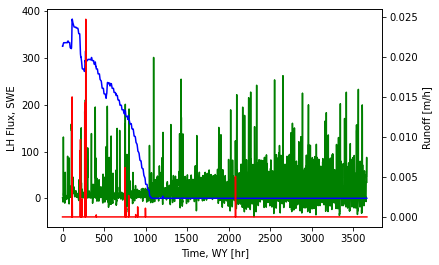

--- 4.939324855804443 seconds ---


Text(0, 0.5, 'Soil Moisture')

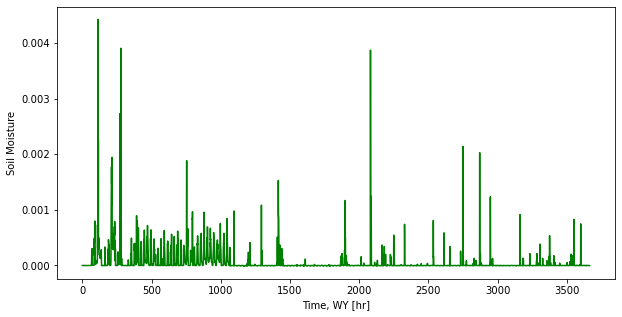

In [2]:
## load PFCLM output and make plots / do anaylsis
## PFB read as a sequence

import parflow as pf
import matplotlib.pyplot as plt
import numpy as np
#import netCDF4 as nc
import xarray as xr
import time as timer
from parflow.tools.fs import get_absolute_path
from glob import glob
from datetime import datetime, timedelta
d1 = datetime(2022, 4, 1,0) 
d2 = datetime(2022, 8, 31,17)
dt = timedelta(hours = 1)
days = np.arange(d1, d2, dt).astype(datetime)
print(np.size(days))

print(days[2507]) #2022-07-14 11:00:00
print(days[3469]) #2022-08-23 13:00:00

start_time = timer.time()

print(os.getcwd())
relative_path_to_runfolder = 'outputs'
path = get_absolute_path(relative_path_to_runfolder)
print(path)

# intialize data and time arrays
#data    = np.zeros([8,3666]) #8760 8,8760
time    = np.zeros([8760])

# reading the CLM file PFCLM_SC.out.clm_output.<file number>.C.pfb
# variables are by layer:
# 0  total latent heat flux (Wm-2)
# 1  total upward LW radiation (Wm-2)
# 2  total sensible heat flux (Wm-2)
# 3  ground heat flux (Wm-2)
# 4  net veg. evaporation and transpiration and soil evaporation (mms-1)
# 5  ground evaporation (mms-1)
# 6  soil evaporation (mms-1)
# 7  vegetation evaporation (canopy) and transpiration (mms-1)
# 8  transpiration (mms-1)
# 9  infiltration flux (mms-1)
# 10 SWE (mm)
# 11 ground temperature (K)
# 12 irrigation flux
# 13 - 24 Soil temperature by layer (K)

slope    = 0.05
mannings = 2.e-6
# loop over a year and assemble files to be loaded as an entire sequence
# then map specific variables to the data array which holds things for analysis
# and plotting

files = glob(path+"/temp15c.out.clm_output.*.C.pfb")
CLM_data = pf.read_pfb_sequence(files)

files = glob(path+"/temp15c.out.press.*.pfb")
pf_data = pf.read_pfb_sequence(files)    
# calculate runoff
runoff = (np.sqrt(slope)/mannings) * np.maximum(pf_data[:,19,0,0],0.0)**(5.0/3.0)


files = glob(path+"/temp15c.out.satur.*.pfb")
sat_data=pf.read_pfb_sequence(files)

# Plot LH Flux, SWE and Runoff
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(CLM_data[:,0,0,0], color='g')
ax.plot(CLM_data[:,10,0,0], color='b')
ax2.plot(runoff[:], color='r')
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('LH Flux, SWE')
ax2.set_ylabel('Runoff [m/h]')
plt.show()

print("--- %s seconds ---" % (timer.time() - start_time))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(CLM_data[:,9,0,0], color='g',label='Infiltration Flux') #
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

In [11]:
np.size(CLM_data[:,8,0,0])

3666

3666
2022-07-14 11:00:00
2022-08-23 13:00:00


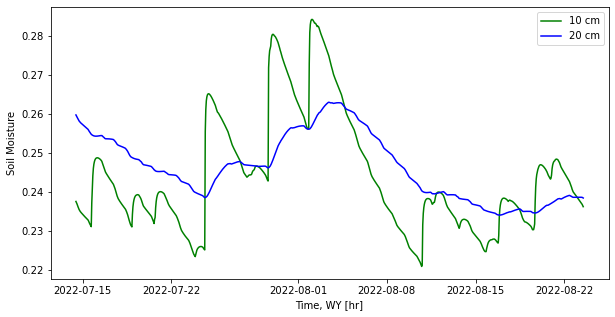

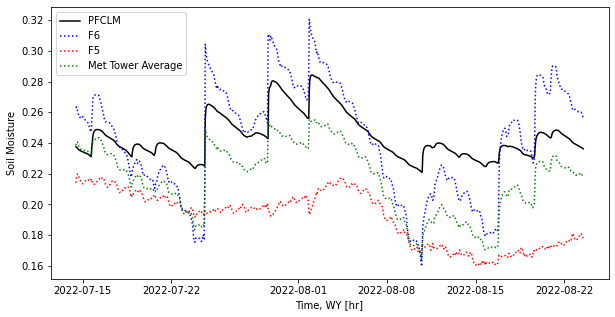

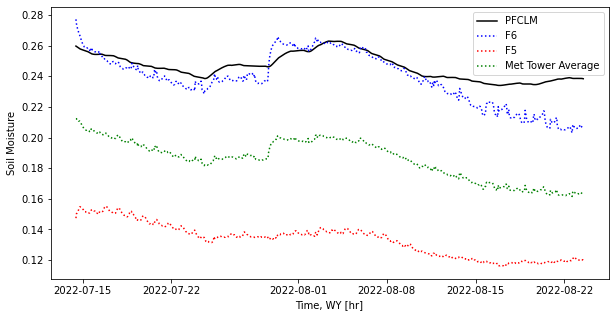

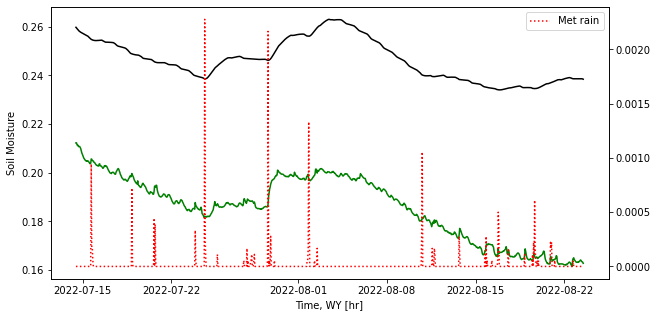

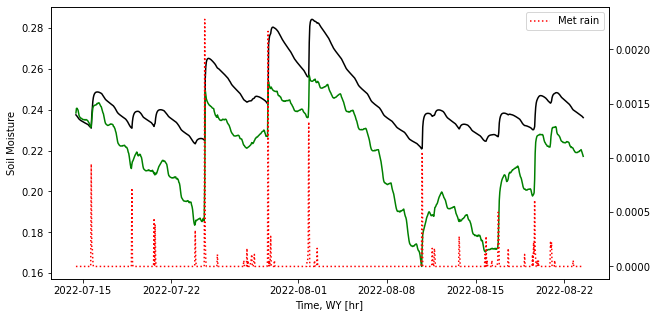

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
d1 = datetime(2022, 4, 1,0) 
d2 = datetime(2022, 8, 31,18)
dt = timedelta(hours = 1)
days = np.arange(d1, d2, dt).astype(datetime)
print(np.size(days))

print(days[2507]) #2022-07-14 11:00:00
print(days[3469]) #2022-08-23 13:00:00

#print(sat_data[:,18,0,0]) #about 10 cm
#print(sat_data[:,17,0,0]) #about 20 cm
#first index is timestep
#second index is layer

sm10=sat_data[:,18,0,0]*run4.Geom.domain.Porosity.Value
sm20=sat_data[:,16,0,0]*run4.Geom.domain.Porosity.Value

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10[2507:3469], color='g',label='10 cm') #
ax.plot(days[2507:3469],sm20[2507:3469], color='b',label="20 cm")#
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

#setting y lims for comparison
#ax2.set_ylim([-0.000015, 0.0002])
#ax.set_ylim([-0.000015,0.00025])
plt.legend()
plt.show()


sm_mt = pd.read_csv('calibration - sm mt hrly.csv')
sm_mt

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10[2507:3469], color='k',label='PFCLM') #
ax.plot(days[2507:3469],sm_mt['F6 10cm'], color='b',linestyle='dotted',label="F6")#
ax.plot(days[2507:3469],sm_mt['F5 10cm'], color='r',linestyle='dotted',label="F5")#
ax.plot(days[2507:3469],sm_mt['10 cm average'], color='g',linestyle='dotted',label="Met Tower Average")#
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm20[2507:3469], color='k',label="PFCLM")#
ax.plot(days[2507:3469],sm_mt['F6 20cm'], color='b',linestyle='dotted',label="F6")#
ax.plot(days[2507:3469],sm_mt['F5 20cm'], color='r',linestyle='dotted',label="F5")#
ax.plot(days[2507:3469],sm_mt['20 cm average'], color='g',linestyle='dotted',label="Met Tower Average")#
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(days[2507:3469],sm20[2507:3469], color='k',label="PFCLM")#
#ax2.plot(days[2507:3469],sm_mt['SAIL rain corrected'], color='b',linestyle='dotted',label="SAIL rain")#
ax2.plot(days[2507:3469],sm_mt['rain (mm/s)'], color='r',linestyle='dotted',label="Met rain")#
ax.plot(days[2507:3469],sm_mt['20 cm average'], color='g',label="Met Tower Average")#
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(days[2507:3469],sm10[2507:3469], color='k',label="PFCLM")#
#ax2.plot(days[2507:3469],sm_mt['SAIL rain corrected'], color='b',linestyle='dotted',label="SAIL rain")#
ax2.plot(days[2507:3469],sm_mt['rain (mm/s)'], color='r',linestyle='dotted',label="Met rain")#
ax.plot(days[2507:3469],sm_mt['10 cm average'], color='g',label="Met Tower Average")#
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')
plt.legend()
plt.show()

#print("total trans: ", np.sum(CLM_data[:,8,0,0]))
#print("total net ET: ", np.sum(CLM_data[:,4,0,0]))

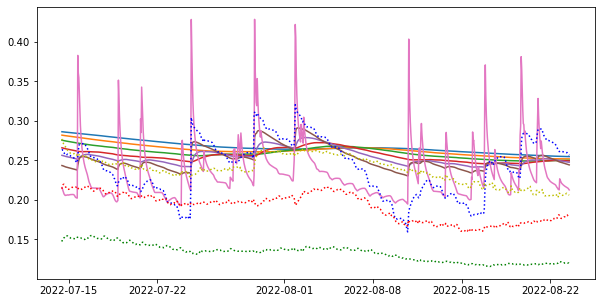

In [10]:
#plt.plot(sat_data[2507:3469,0,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
#plt.plot(sat_data[2507:3469,1,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
#plt.plot(sat_data[2507:3469,2,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
#plt.plot(sat_data[2507:3469,3,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
#plt.plot(sat_data[2507:3469,4,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
#plt.plot(sat_data[2507:3469,5,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
#plt.plot(sat_data[2507:3469,6,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
#plt.plot(sat_data[2507:3469,7,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
#plt.plot(sat_data[2507:3469,8,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
#plt.plot(sat_data[2507:3469,9,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
#plt.plot(sat_data[2507:3469,10,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
#plt.plot(sat_data[2507:3469,11,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
#plt.plot(sat_data[2507:3469,12,0,0]*PFCLM_SC.Geom.domain.Porosity.Value)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sat_data[2507:3469,13,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sat_data[2507:3469,14,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sat_data[2507:3469,15,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sat_data[2507:3469,16,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sat_data[2507:3469,17,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sat_data[2507:3469,18,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sat_data[2507:3469,19,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sm_mt['F6 10cm'], color='b',linestyle='dotted',label="F6")#
ax.plot(days[2507:3469],sm_mt['F5 10cm'], color='r',linestyle='dotted',label="F5")#
ax.plot(days[2507:3469],sm_mt['F6 20cm'], color='y',linestyle='dotted',label="F6")#
ax.plot(days[2507:3469],sm_mt['F5 20cm'], color='g',linestyle='dotted',label="F5")#
#ax.plot(days[2507:3469],sm_mt['20 cm average'], color='k',linestyle='dotted',label="Met Tower Average")#
#ax.plot(days[2507:3469],sm_mt['10 cm average'], color='k',linestyle='dotted',label="Met Tower Average")#

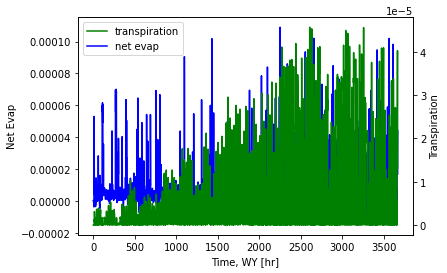

total trans:  0.01894419885826202
total net ET:  0.03389521852409022


In [4]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.plot(CLM_data[:,8,0,0], color='g',label='transpiration') #transpiration
ax2.plot(0,color="b",label="net evap")
ax.plot(CLM_data[:,4,0,0], color='b',label="net evap")#net ET and soil evap
ax.set_xlabel('Time, WY [hr]')
ax2.set_ylabel('Transpiration')
ax.set_ylabel('Net Evap')

#setting y lims for comparison
#ax2.set_ylim([-0.000015, 0.0002])
#ax.set_ylim([-0.000015,0.00025])
plt.legend()
plt.show()

print("total trans: ", np.sum(CLM_data[:,8,0,0]))
print("total net ET: ", np.sum(CLM_data[:,4,0,0]))

3667
73340
3667


Text(0, 0.5, 'Soil Moisture')

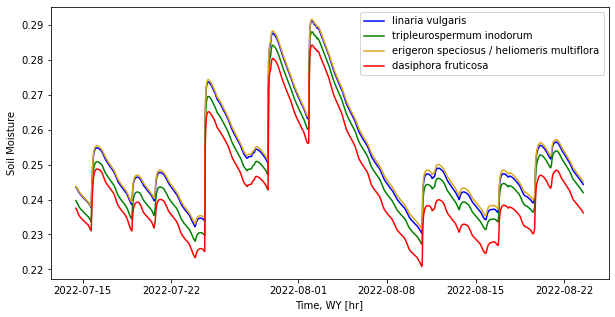

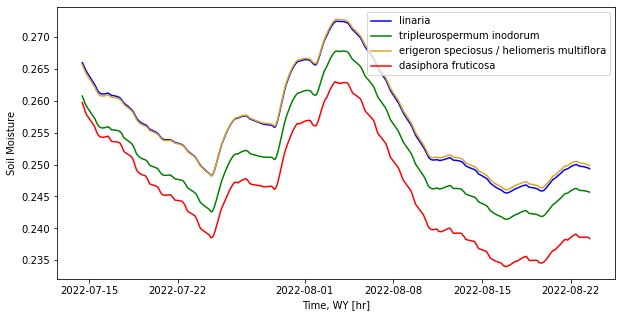

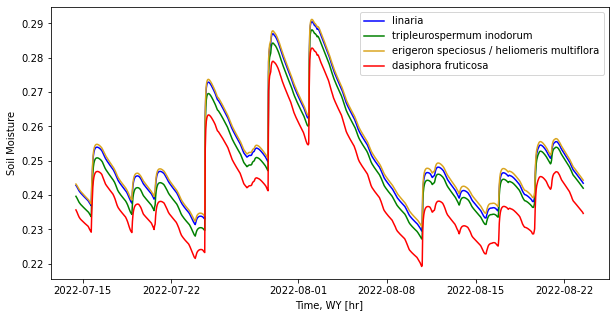

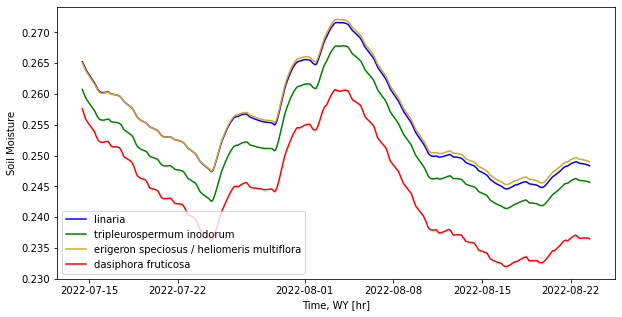

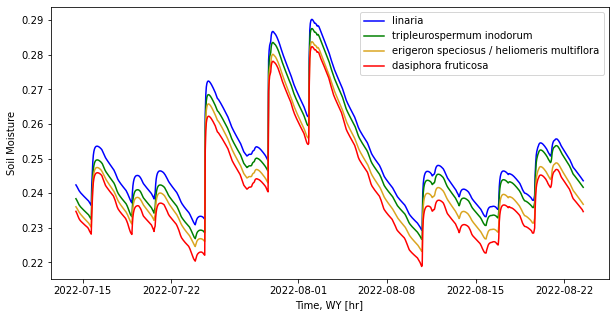

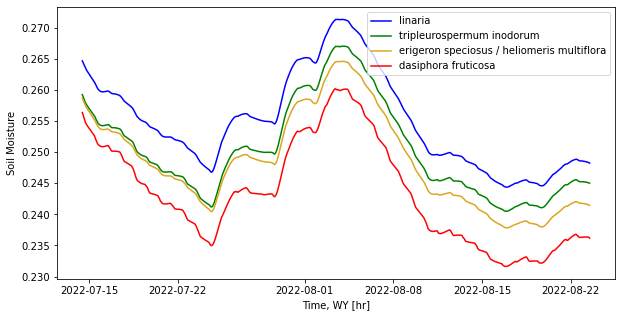

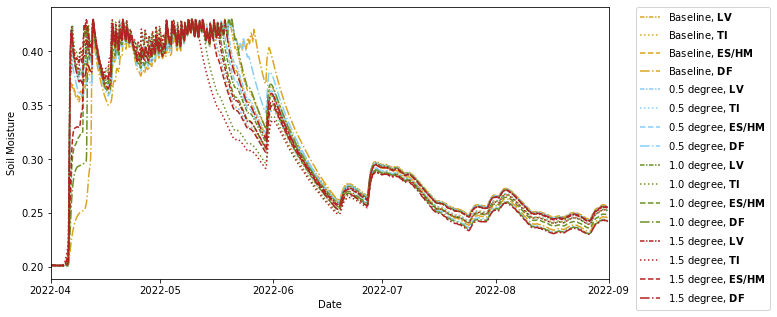

In [3]:
#SOIL MOISTURE TRACES

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
d1 = datetime(2022, 4, 1,0) 
d2 = datetime(2022, 8, 31,19)
dt = timedelta(hours = 1)
days = np.arange(d1, d2, dt).astype(datetime)
print(np.size(days))

files = glob(path+"/run1.out.satur.*.pfb")
sat_basea=pf.read_pfb_sequence(files)
files = glob(path+"/run2.out.satur.*.pfb")
sat_baseb=pf.read_pfb_sequence(files)
files = glob(path+"/run3.out.satur.*.pfb")
sat_basec=pf.read_pfb_sequence(files)
files = glob(path+"/run4.out.satur.*.pfb")
sat_based=pf.read_pfb_sequence(files)

files = glob(path+"/temp05a.out.satur.*.pfb")
sat_temp05a=pf.read_pfb_sequence(files)
files = glob(path+"/temp10a.out.satur.*.pfb")
sat_temp10a=pf.read_pfb_sequence(files)
files = glob(path+"/temp15a.out.satur.*.pfb")
sat_temp15a=pf.read_pfb_sequence(files)

files = glob(path+"/temp05b.out.satur.*.pfb")
sat_temp05b=pf.read_pfb_sequence(files)
files = glob(path+"/temp10b.out.satur.*.pfb")
sat_temp10b=pf.read_pfb_sequence(files)
files = glob(path+"/temp15b.out.satur.*.pfb")
sat_temp15b=pf.read_pfb_sequence(files)

files = glob(path+"/temp05c.out.satur.*.pfb")
sat_temp05c=pf.read_pfb_sequence(files)
files = glob(path+"/temp10c.out.satur.*.pfb")
sat_temp10c=pf.read_pfb_sequence(files)
files = glob(path+"/temp15c.out.satur.*.pfb")
sat_temp15c=pf.read_pfb_sequence(files)

files = glob(path+"/temp05d.out.satur.*.pfb")
sat_temp05d=pf.read_pfb_sequence(files)
files = glob(path+"/temp10d.out.satur.*.pfb")
sat_temp10d=pf.read_pfb_sequence(files)
files = glob(path+"/temp15d.out.satur.*.pfb")
sat_temp15d=pf.read_pfb_sequence(files)

print(np.size(sat_temp10c))

sm10_basea=sat_basea[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_basea=sat_basea[:,16,0,0]*temp15c.Geom.domain.Porosity.Value

sm10_baseb=sat_baseb[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_baseb=sat_baseb[:,16,0,0]*temp15c.Geom.domain.Porosity.Value

sm10_basec=sat_basec[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_basec=sat_basec[:,16,0,0]*temp15c.Geom.domain.Porosity.Value

sm10_based=sat_based[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_based=sat_based[:,16,0,0]*temp15c.Geom.domain.Porosity.Value

sm10_temp05a=sat_temp05a[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_temp05a=sat_temp05a[:,16,0,0]*temp15c.Geom.domain.Porosity.Value
sm10_temp10a=sat_temp10a[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_temp10a=sat_temp10a[:,16,0,0]*temp15c.Geom.domain.Porosity.Value
sm10_temp15a=sat_temp15a[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_temp15a=sat_temp15a[:,16,0,0]*temp15c.Geom.domain.Porosity.Value

sm10_temp05b=sat_temp05b[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_temp05b=sat_temp05b[:,16,0,0]*temp15c.Geom.domain.Porosity.Value
sm10_temp10b=sat_temp10b[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_temp10b=sat_temp10b[:,16,0,0]*temp15c.Geom.domain.Porosity.Value
sm10_temp15b=sat_temp15b[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_temp15b=sat_temp15b[:,16,0,0]*temp15c.Geom.domain.Porosity.Value

sm10_temp05c=sat_temp05c[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_temp05c=sat_temp05c[:,16,0,0]*temp15c.Geom.domain.Porosity.Value
sm10_temp10c=sat_temp10c[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_temp10c=sat_temp10c[:,16,0,0]*temp15c.Geom.domain.Porosity.Value
sm10_temp15c=sat_temp15c[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_temp15c=sat_temp15c[:,16,0,0]*temp15c.Geom.domain.Porosity.Value

sm10_temp05d=sat_temp05d[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_temp05d=sat_temp05d[:,16,0,0]*temp15c.Geom.domain.Porosity.Value
sm10_temp10d=sat_temp10d[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_temp10d=sat_temp10d[:,16,0,0]*temp15c.Geom.domain.Porosity.Value
sm10_temp15d=sat_temp15d[:,18,0,0]*temp15c.Geom.domain.Porosity.Value
sm20_temp15d=sat_temp15d[:,16,0,0]*temp15c.Geom.domain.Porosity.Value

print(np.size(sm10_temp10c))


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10_basea[2507:3469], color='b',label='linaria vulgaris') #
ax.plot(days[2507:3469],sm10_baseb[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm10_basec[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm10_based[2507:3469], color='r',label="dasiphora fruticosa")#
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm20_basea[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm20_baseb[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm20_basec[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm20_based[2507:3469], color='r',label="dasiphora fruticosa")#
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10_temp05a[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm10_temp05b[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm10_temp05c[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm10_temp05d[2507:3469], color='r',label="dasiphora fruticosa")#
#ax.set_ylim(0.17,0.29)
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm20_temp05a[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm20_temp05b[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm20_temp05c[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm20_temp05d[2507:3469], color='r',label="dasiphora fruticosa")#
#ax.set_ylim(0.17,0.29)
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10_temp10a[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm10_temp10b[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm10_temp10c[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm10_temp10d[2507:3469], color='r',label="dasiphora fruticosa")#
#ax.set_ylim(0.17,0.29)
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm20_temp10a[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm20_temp10b[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm20_temp10c[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm20_temp10d[2507:3469], color='r',label="dasiphora fruticosa")#
#ax.set_ylim(0.17,0.29)
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')





fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(days,sm20_basea,linestyle=(0, (3, 1, 1, 1)),color='goldenrod',label='Baseline, $\\bf{LV}$') #
ax.plot(days,sm20_baseb, color='goldenrod',linestyle='dotted',label="Baseline, $\\bf{TI}$")#
ax.plot(days,sm20_basec, color='goldenrod',linestyle='dashed',label="Baseline, $\\bf{ES/HM}$")#
ax.plot(days,sm20_based, color='goldenrod',linestyle='dashdot',label="Baseline, $\\bf{DF}$")#

ax.plot(days,sm20_temp05a,linestyle=(0, (3, 1, 1, 1)),color='lightskyblue',label='0.5 degree, $\\bf{LV}$') #
ax.plot(days,sm20_temp05b, color='lightskyblue',linestyle='dotted',label="0.5 degree, $\\bf{TI}$")#
ax.plot(days,sm20_temp05c, color='lightskyblue',linestyle='dashed',label="0.5 degree, $\\bf{ES/HM}$")#
ax.plot(days,sm20_temp05d, color='lightskyblue',linestyle='dashdot',label="0.5 degree, $\\bf{DF}$")#

ax.plot(days,sm20_temp10a,linestyle=(0, (3, 1, 1, 1)),color='olivedrab',label='1.0 degree, $\\bf{LV}$') #
ax.plot(days,sm20_temp10b, color='olivedrab',linestyle='dotted',label="1.0 degree, $\\bf{TI}$")#
ax.plot(days,sm20_temp10c, color='olivedrab',linestyle='dashed',label="1.0 degree, $\\bf{ES/HM}$")#
ax.plot(days,sm20_temp10d, color='olivedrab',linestyle='dashdot',label="1.0 degree, $\\bf{DF}$")#

ax.plot(days,sm20_temp15a,linestyle=(0, (3, 1, 1, 1)),color='firebrick',label='1.5 degree, $\\bf{LV}$') #
ax.plot(days,sm20_temp15b, color='firebrick',linestyle='dotted',label="1.5 degree, $\\bf{TI}$")#
ax.plot(days,sm20_temp15c, color='firebrick',linestyle='dashed',label="1.5 degree, $\\bf{ES/HM}$")#
ax.plot(days,sm20_temp15d, color='firebrick',linestyle='dashdot',label="1.5 degree, $\\bf{DF}$")#



ax.set_xlim(datetime(2022, 4, 1,0),datetime(2022, 9, 1,0))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel('Date')
ax.set_ylabel('Soil Moisture')

Text(0, 0.5, 'Soil Moisture')

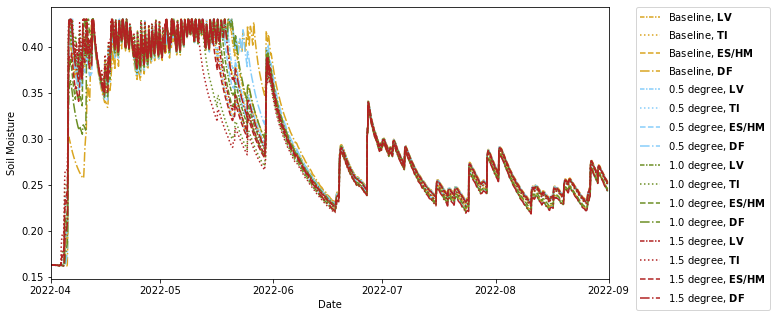

In [21]:

#SOIL MOISUTRE

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(days,sm10_basea,linestyle=(0, (3, 1, 1, 1)),color='goldenrod',label='Baseline, $\\bf{LV}$') #
ax.plot(days,sm10_baseb, color='goldenrod',linestyle='dotted',label="Baseline, $\\bf{TI}$")#
ax.plot(days,sm10_basec, color='goldenrod',linestyle='dashed',label="Baseline, $\\bf{ES/HM}$")#
ax.plot(days,sm10_based, color='goldenrod',linestyle='dashdot',label="Baseline, $\\bf{DF}$")#

ax.plot(days,sm10_temp05a,linestyle=(0, (3, 1, 1, 1)),color='lightskyblue',label='0.5 degree, $\\bf{LV}$') #
ax.plot(days,sm10_temp05b, color='lightskyblue',linestyle='dotted',label="0.5 degree, $\\bf{TI}$")#
ax.plot(days,sm10_temp05c, color='lightskyblue',linestyle='dashed',label="0.5 degree, $\\bf{ES/HM}$")#
ax.plot(days,sm10_temp05d, color='lightskyblue',linestyle='dashdot',label="0.5 degree, $\\bf{DF}$")#

ax.plot(days,sm10_temp10a,linestyle=(0, (3, 1, 1, 1)),color='olivedrab',label='1.0 degree, $\\bf{LV}$') #
ax.plot(days,sm10_temp10b, color='olivedrab',linestyle='dotted',label="1.0 degree, $\\bf{TI}$")#
ax.plot(days,sm10_temp10c, color='olivedrab',linestyle='dashed',label="1.0 degree, $\\bf{ES/HM}$")#
ax.plot(days,sm10_temp10d, color='olivedrab',linestyle='dashdot',label="1.0 degree, $\\bf{DF}$")#

ax.plot(days,sm10_temp15a,linestyle=(0, (3, 1, 1, 1)),color='firebrick',label='1.5 degree, $\\bf{LV}$') #
ax.plot(days,sm10_temp15b, color='firebrick',linestyle='dotted',label="1.5 degree, $\\bf{TI}$")#
ax.plot(days,sm10_temp15c, color='firebrick',linestyle='dashed',label="1.5 degree, $\\bf{ES/HM}$")#
ax.plot(days,sm10_temp15d, color='firebrick',linestyle='dashdot',label="1.5 degree, $\\bf{DF}$")#



ax.set_xlim(datetime(2022, 4, 1,0),datetime(2022, 9, 1,0))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel('Date')
ax.set_ylabel('Soil Moisture')

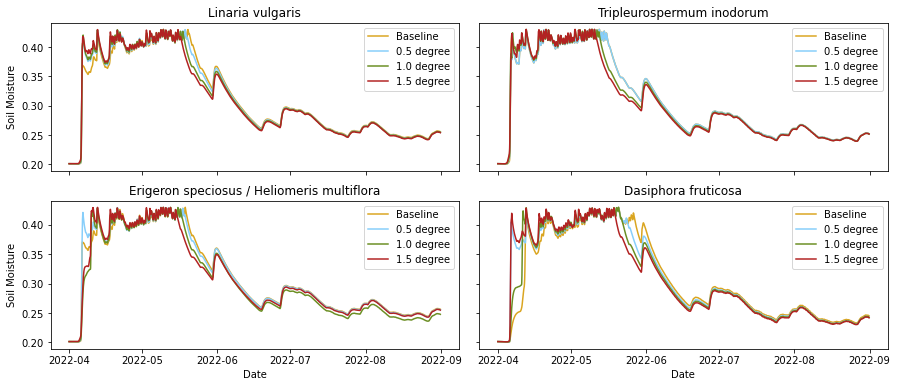

In [19]:
#SOIL MOISTURE, 20cm
fig, ax = plt.subplots(2, 2, figsize=(15,6),sharex=True,sharey=True)

ax[0,0].set_title('Linaria vulgaris')
ax[0,1].set_title('Tripleurospermum inodorum')
ax[1,0].set_title('Erigeron speciosus / Heliomeris multiflora')
ax[1,1].set_title('Dasiphora fruticosa')



ax[0,0].plot(days,sm20_basea,color='goldenrod',label='Baseline') #
ax[0,1].plot(days,sm20_baseb, color='goldenrod',label="Baseline")#
ax[1,0].plot(days,sm20_basec, color='goldenrod',label="Baseline")#
ax[1,1].plot(days,sm20_based, color='goldenrod',label="Baseline")#

ax[0,0].plot(days,sm20_temp05a,color='lightskyblue',label='0.5 degree') #
ax[0,1].plot(days,sm20_temp05b, color='lightskyblue',label="0.5 degree")#
ax[1,0].plot(days,sm20_temp05c, color='lightskyblue',label="0.5 degree")#
ax[1,1].plot(days,sm20_temp05d, color='lightskyblue',label="0.5 degree")#

ax[0,0].plot(days,sm20_temp10a,color='olivedrab',label='1.0 degree') #
ax[0,1].plot(days,sm20_temp10b, color='olivedrab',label="1.0 degree")#
ax[1,0].plot(days,sm20_temp10c, color='olivedrab',label="1.0 degree")#
ax[1,1].plot(days,sm20_temp10d, color='olivedrab',label="1.0 degree")#

ax[0,0].plot(days,sm20_temp15a,color='firebrick',label='1.5 degree') #
ax[0,1].plot(days,sm20_temp15b, color='firebrick',label="1.5 degree")#
ax[1,0].plot(days,sm20_temp15c, color='firebrick',label="1.5 degree")#
ax[1,1].plot(days,sm20_temp15d, color='firebrick',label="1.5 degree")#

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

ax[1,0].set_xlabel('Date')
ax[1,1].set_xlabel('Date')
ax[0,0].set_ylabel('Soil Moisture')
ax[1,0].set_ylabel('Soil Moisture')


plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.show()

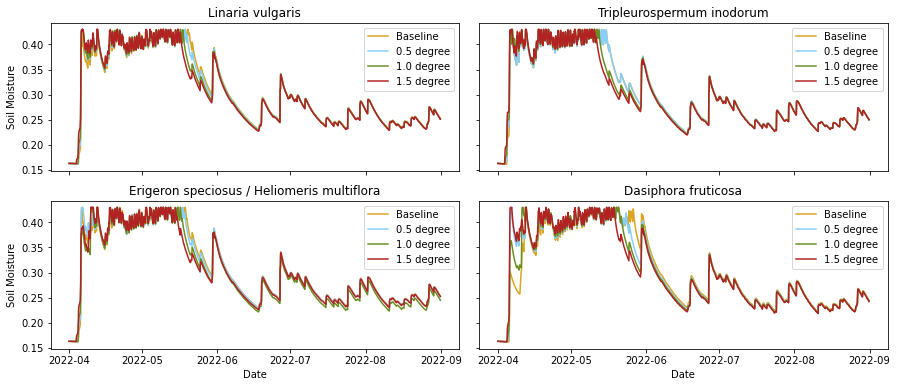

In [20]:
#SOIL MOISTURE, 10 cm
fig, ax = plt.subplots(2, 2, figsize=(15,6),sharex=True,sharey=True)

ax[0,0].set_title('Linaria vulgaris')
ax[0,1].set_title('Tripleurospermum inodorum')
ax[1,0].set_title('Erigeron speciosus / Heliomeris multiflora')
ax[1,1].set_title('Dasiphora fruticosa')



ax[0,0].plot(days,sm10_basea,color='goldenrod',label='Baseline') #
ax[0,1].plot(days,sm10_baseb, color='goldenrod',label="Baseline")#
ax[1,0].plot(days,sm10_basec, color='goldenrod',label="Baseline")#
ax[1,1].plot(days,sm10_based, color='goldenrod',label="Baseline")#

ax[0,0].plot(days,sm10_temp05a,color='lightskyblue',label='0.5 degree') #
ax[0,1].plot(days,sm10_temp05b, color='lightskyblue',label="0.5 degree")#
ax[1,0].plot(days,sm10_temp05c, color='lightskyblue',label="0.5 degree")#
ax[1,1].plot(days,sm10_temp05d, color='lightskyblue',label="0.5 degree")#

ax[0,0].plot(days,sm10_temp10a,color='olivedrab',label='1.0 degree') #
ax[0,1].plot(days,sm10_temp10b, color='olivedrab',label="1.0 degree")#
ax[1,0].plot(days,sm10_temp10c, color='olivedrab',label="1.0 degree")#
ax[1,1].plot(days,sm10_temp10d, color='olivedrab',label="1.0 degree")#

ax[0,0].plot(days,sm10_temp15a,color='firebrick',label='1.5 degree') #
ax[0,1].plot(days,sm10_temp15b, color='firebrick',label="1.5 degree")#
ax[1,0].plot(days,sm10_temp15c, color='firebrick',label="1.5 degree")#
ax[1,1].plot(days,sm10_temp15d, color='firebrick',label="1.5 degree")#

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()


#ax[0,0].set_xlim(datetime(2022, 4, 1,0),datetime(2022, 9, 1,0))
#ax[0,1].set_xlim(datetime(2022, 4, 1,0),datetime(2022, 9, 1,0))
#ax[1,0].set_xlim(datetime(2022, 4, 1,0),datetime(2022, 9, 1,0))
#ax[1,1].set_xlim(datetime(2022, 4, 1,0),datetime(2022, 9, 1,0))

ax[1,0].set_xlabel('Date')
ax[1,1].set_xlabel('Date')
ax[0,0].set_ylabel('Soil Moisture')
ax[1,0].set_ylabel('Soil Moisture')


plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.show()

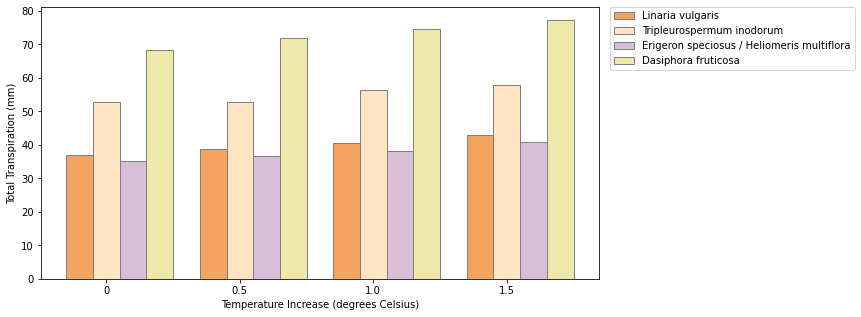

In [4]:
#TRANSPIRATION

files = glob(path+"/run1.out.clm_output.*.pfb")
CLM_basea=pf.read_pfb_sequence(files)

files = glob(path+"/run2.out.clm_output.*.pfb")
CLM_baseb=pf.read_pfb_sequence(files)

files = glob(path+"/run3.out.clm_output.*.pfb")
CLM_basec=pf.read_pfb_sequence(files)

files = glob(path+"/run4.out.clm_output.*.pfb")
CLM_based=pf.read_pfb_sequence(files)

files = glob(path+"/temp05a.out.clm_output.*.pfb")
CLM_temp05a=pf.read_pfb_sequence(files)
files = glob(path+"/temp10a.out.clm_output.*.pfb")
CLM_temp10a=pf.read_pfb_sequence(files)
files = glob(path+"/temp15a.out.clm_output.*.pfb")
CLM_temp15a=pf.read_pfb_sequence(files)

files = glob(path+"/temp05b.out.clm_output.*.pfb")
CLM_temp05b=pf.read_pfb_sequence(files)
files = glob(path+"/temp10b.out.clm_output.*.pfb")
CLM_temp10b=pf.read_pfb_sequence(files)
files = glob(path+"/temp15b.out.clm_output.*.pfb")
CLM_temp15b=pf.read_pfb_sequence(files)

files = glob(path+"/temp05c.out.clm_output.*.pfb")
CLM_temp05c=pf.read_pfb_sequence(files)
files = glob(path+"/temp10c.out.clm_output.*.pfb")
CLM_temp10c=pf.read_pfb_sequence(files)
files = glob(path+"/temp15c.out.clm_output.*.pfb")
CLM_temp15c=pf.read_pfb_sequence(files)

files = glob(path+"/temp05d.out.clm_output.*.pfb")
CLM_temp05d=pf.read_pfb_sequence(files)
files = glob(path+"/temp10d.out.clm_output.*.pfb")
CLM_temp10d=pf.read_pfb_sequence(files)
files = glob(path+"/temp15d.out.clm_output.*.pfb")
CLM_temp15d=pf.read_pfb_sequence(files)

tbasea=np.sum(CLM_basea[:,8,0,0])*60*60
tbaseb=np.sum(CLM_baseb[:,8,0,0])*60*60
tbasec=np.sum(CLM_basec[:,8,0,0])*60*60
tbased=np.sum(CLM_based[:,8,0,0])*60*60
ttemp05a=np.sum(CLM_temp05a[:,8,0,0])*60*60
ttemp05b=np.sum(CLM_temp05b[:,8,0,0])*60*60
ttemp05c=np.sum(CLM_temp05c[:,8,0,0])*60*60
ttemp05d=np.sum(CLM_temp05d[:,8,0,0])*60*60
ttemp10a=np.sum(CLM_temp10a[:,8,0,0])*60*60
ttemp10b=np.sum(CLM_temp10b[:,8,0,0])*60*60
ttemp10c=np.sum(CLM_temp10c[:,8,0,0])*60*60
ttemp10d=np.sum(CLM_temp10d[:,8,0,0])*60*60
ttemp15a=np.sum(CLM_temp15a[:,8,0,0])*60*60
ttemp15b=np.sum(CLM_temp15b[:,8,0,0])*60*60
ttemp15c=np.sum(CLM_temp15c[:,8,0,0])*60*60
ttemp15d=np.sum(CLM_temp15d[:,8,0,0])*60*60


fig, ax = plt.subplots(figsize=(10, 5))
tempbase=[tbasea,tbaseb,tbasec,tbased]
temp05=[ttemp05a,ttemp05b,ttemp05c,ttemp05d]
temp10=[ttemp10a,ttemp10b,ttemp10c,ttemp10d]
temp15=[ttemp15a,ttemp15b,ttemp15c,ttemp15d]

linaria_vulgaris=[tbasea,ttemp05a,ttemp10a,ttemp15a]
tripleurospermum_inodorum=[tbaseb,ttemp05b,ttemp10b,ttemp15b]
erigeron_speciosus_heliomeris_multiflora=[tbasec,ttemp05c,ttemp10c,ttemp15c]
dasiphora_fructicosa=[tbased,ttemp05d,ttemp10d,ttemp15d]

barWidth=0.2
br1=np.arange(len(linaria_vulgaris))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]

plt.bar(br1,linaria_vulgaris,edgecolor='grey',color='sandybrown',width=barWidth,label="Linaria vulgaris")
plt.bar(br2,tripleurospermum_inodorum,edgecolor='grey',color='bisque',width=barWidth,label='Tripleurospermum inodorum')
plt.bar(br3,erigeron_speciosus_heliomeris_multiflora,edgecolor='grey',color='thistle',width=barWidth,label='Erigeron speciosus / Heliomeris multiflora')
plt.bar(br4,dasiphora_fructicosa,color='palegoldenrod',edgecolor='grey',width=barWidth,label='Dasiphora fruticosa')

plt.xlabel('Temperature Increase (degrees Celsius)')
plt.ylabel('Total Transpiration (mm)')
plt.xticks([r + barWidth for r in range(len(linaria_vulgaris))],['0','0.5','1.0','1.5'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


#tPlot, axs = plt.subplots(figsize=(13,8),nrows=4, ncols=1, sharex=True, sharey=True, gridspec_kw={'height_ratios':[2,2,2,2]})
#tPlot.suptitle('Transpiration', fontsize=20)
#axs[0].plot(CLM_swe100a[:,8,0,0],color='b',label='linaria')
#axs[1].plot(CLM_basea[:,8,0,0],color='g',label="tripleurospermum inodorum")
#axs[2].plot(CLM_swe1300a[:,8,0,0],color='goldenrod',label="erigeron speciosus / heliomeris multiflora")
#axs[3].plot(CLM_swe100b[:,8,0,0], color='r',label="dasiphora fruticosa")
#axs[3].set_xlabel('Time, WY [hr]')
#axs[1].set_ylabel('Transpiration [mm/s]')
#plt.show()

#tPlot, axs = plt.subplots(figsize=(13,8),nrows=4, ncols=1, sharex=True, sharey=True, gridspec_kw={'height_ratios':[2,2,2,2]})
#tPlot.suptitle('Net ET and Soil Evap', fontsize=20)
#axs[0].plot(CLM_data1[:,4,0,0],color='b',label='linaria')
#axs[1].plot(CLM_data3[:,4,0,0],color='g',label="tripleurospermum inodorum")
#axs[2].plot(CLM_data4[:,4,0,0],color='goldenrod',label="erigeron speciosus / heliomeris multiflora")
#axs[3].plot(CLM_data5[:,4,0,0], color='r',label="dasiphora fruticosa")
#axs[3].set_xlabel('Time, WY [hr]')
#axs[1].set_ylabel('Net ET [mm/s]')
#plt.show()



#print("total trans: ", np.sum(CLM_data[:,8,0,0]))
#print("total net ET: ", np.sum(CLM_data[:,4,0,0]))

In [25]:
print(tempbase)
print(temp05)
print(temp10)
print(temp15)


[36.961288610583296, 52.872912723310534, 35.110424375925774, 68.19911588974327]
[38.801502817648924, 52.88130230562319, 36.7873465408548, 71.8906287603882]
[40.638187864717885, 56.52459191744966, 38.27505545374382, 74.5683020244839]
[43.021264904801214, 57.84497152803501, 40.858062806010224, 77.32323755066436]
38.27505545374382
56.52459191744966


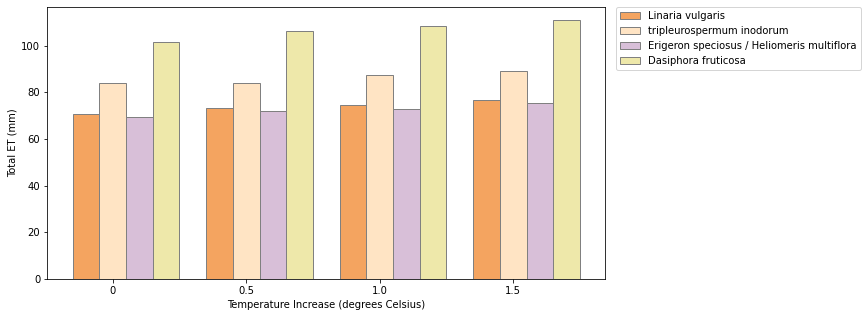

In [5]:
#ET
tbasea=np.sum(CLM_basea[:,7,0,0])*60*60
tbaseb=np.sum(CLM_baseb[:,7,0,0])*60*60
tbasec=np.sum(CLM_basec[:,7,0,0])*60*60
tbased=np.sum(CLM_based[:,7,0,0])*60*60
ttemp05a=np.sum(CLM_temp05a[:,7,0,0])*60*60
ttemp05b=np.sum(CLM_temp05b[:,7,0,0])*60*60
ttemp05c=np.sum(CLM_temp05c[:,7,0,0])*60*60
ttemp05d=np.sum(CLM_temp05d[:,7,0,0])*60*60
ttemp10a=np.sum(CLM_temp10a[:,7,0,0])*60*60
ttemp10b=np.sum(CLM_temp10b[:,7,0,0])*60*60
ttemp10c=np.sum(CLM_temp10c[:,7,0,0])*60*60
ttemp10d=np.sum(CLM_temp10d[:,7,0,0])*60*60
ttemp15a=np.sum(CLM_temp15a[:,7,0,0])*60*60
ttemp15b=np.sum(CLM_temp15b[:,7,0,0])*60*60
ttemp15c=np.sum(CLM_temp15c[:,7,0,0])*60*60
ttemp15d=np.sum(CLM_temp15d[:,7,0,0])*60*60


fig, ax = plt.subplots(figsize=(10, 5))
tempbase=[tbasea,tbaseb,tbasec,tbased]
temp05=[ttemp05a,ttemp05b,ttemp05c,ttemp05d]
temp10=[ttemp10a,ttemp10b,ttemp10c,ttemp10d]
temp15=[ttemp15a,ttemp15b,ttemp15c,ttemp15d]

linaria_vulgaris=[tbasea,ttemp05a,ttemp10a,ttemp15a]
tripleurospermum_inodorum=[tbaseb,ttemp05b,ttemp10b,ttemp15b]
erigeron_speciosus_heliomeris_multiflora=[tbasec,ttemp05c,ttemp10c,ttemp15c]
dasiphora_fructicosa=[tbased,ttemp05d,ttemp10d,ttemp15d]

barWidth=0.2
br1=np.arange(len(linaria_vulgaris))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]

plt.bar(br1,linaria_vulgaris,edgecolor='grey',color='sandybrown',width=barWidth,label="Linaria vulgaris")
plt.bar(br2,tripleurospermum_inodorum,edgecolor='grey',color='bisque',width=barWidth,label='tripleurospermum inodorum')
plt.bar(br3,erigeron_speciosus_heliomeris_multiflora,edgecolor='grey',color='thistle',width=barWidth,label='Erigeron speciosus / Heliomeris multiflora')
plt.bar(br4,dasiphora_fructicosa,color='palegoldenrod',edgecolor='grey',width=barWidth,label='Dasiphora fruticosa')

plt.xlabel('Temperature Increase (degrees Celsius)')
plt.ylabel('Total ET (mm)')
plt.xticks([r + barWidth for r in range(len(linaria_vulgaris))],['0','0.5','1.0','1.5'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Dasiphora Fruticosa')

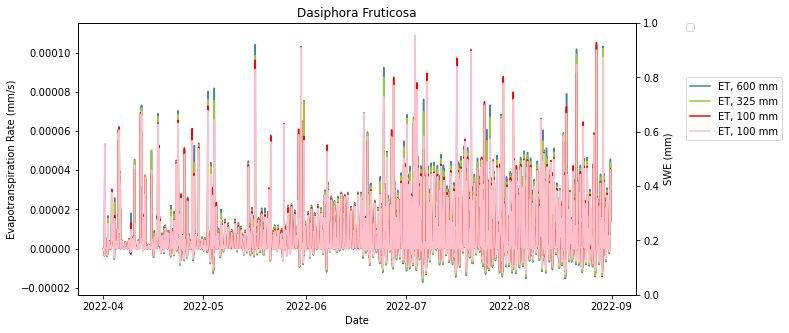

In [41]:
#ET Time series
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()

ax.plot(days[0:3666],CLM_temp15d[:,7,0,0],label="ET, 600 mm",color='steelblue')
ax.plot(days[0:3666],CLM_temp10d[:,7,0,0],label="ET, 325 mm", color='yellowgreen')
ax.plot(days[0:3666],CLM_temp05d[:,7,0,0],label='ET, 100 mm',color='red')
ax.plot(days[0:3666],CLM_based[:,7,0,0],label='ET, 100 mm',color='pink')


#ax2.plot(days[0:3666],CLM_swe100d[:,10,0,0],label='SWE, 100mm',color='blue',linestyle='--')
#ax2.plot(days[0:3666],CLM_based[:,10,0,0],label='SWE, 325 mm',color='darkgreen',linestyle='dashdot')
#ax2.plot(days[0:3666],CLM_swe1300d[:,10,0,0],label='SWE, 600mm',color='darkred',linestyle='dashdot')



ax.set_ylabel('Evapotranspiration Rate (mm/s)')
ax.set_xlabel('Date')
ax2.set_ylabel('SWE (mm)')
ax.legend(bbox_to_anchor=(1.09, 0.8), loc='upper left', borderaxespad=0)
ax2.legend(bbox_to_anchor=(1.09, 1), loc='upper left', borderaxespad=0)

ax.set_title('Dasiphora Fruticosa')

3666
2022-07-14 11:00:00
2022-08-23 13:00:00


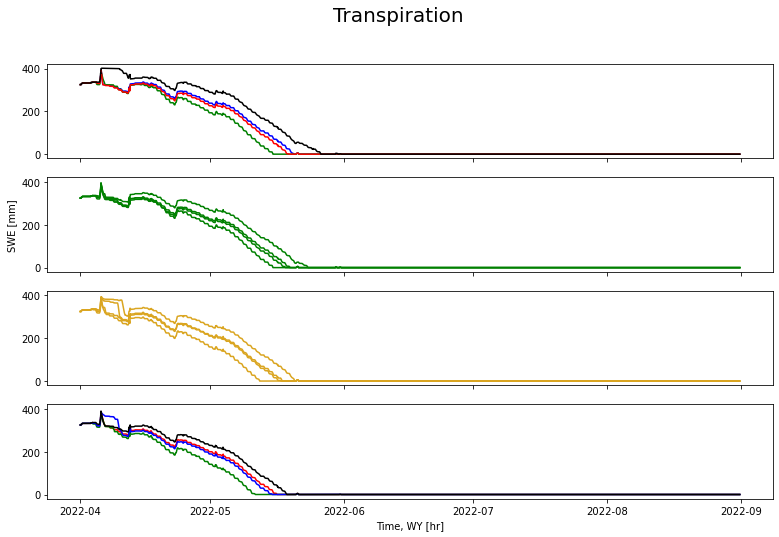

In [29]:
#SWE time series

from datetime import datetime, timedelta
d1 = datetime(2022, 4, 1,0) 
d2 = datetime(2022, 8, 31,18)
dt = timedelta(hours = 1)
days = np.arange(d1, d2, dt).astype(datetime)
print(np.size(days))

print(days[2507]) #2022-07-14 11:00:00
print(days[3469]) #2022-08-23 13:00:00

tPlot, axs = plt.subplots(figsize=(13,8),nrows=4, ncols=1, sharex=True, sharey=True, gridspec_kw={'height_ratios':[2,2,2,2]})
tPlot.suptitle('Transpiration', fontsize=20)
axs[0].plot(days, CLM_basea[:,10,0,0],color='b',label='linaria')
axs[0].plot(days, CLM_baseb[:,10,0,0],color='g',label='linaria')
axs[0].plot(days, CLM_basec[:,10,0,0],color='r',label='linaria')
axs[0].plot(days, CLM_based[:,10,0,0],color='k',label='linaria')
axs[1].plot(days, CLM_temp05a[:,10,0,0],color='g',label="tripleurospermum inodorum")
axs[1].plot(days, CLM_temp05b[:,10,0,0],color='g',label="tripleurospermum inodorum")
axs[1].plot(days, CLM_temp05c[:,10,0,0],color='g',label="tripleurospermum inodorum")
axs[1].plot(days, CLM_temp05d[:,10,0,0],color='g',label="tripleurospermum inodorum")
axs[2].plot(days, CLM_temp10a[:,10,0,0],color='goldenrod',label="erigeron speciosus / heliomeris multiflora")
axs[2].plot(days, CLM_temp10b[:,10,0,0],color='goldenrod',label="erigeron speciosus / heliomeris multiflora")
axs[2].plot(days, CLM_temp10c[:,10,0,0],color='goldenrod',label="erigeron speciosus / heliomeris multiflora")
axs[2].plot(days, CLM_temp10d[:,10,0,0],color='goldenrod',label="erigeron speciosus / heliomeris multiflora")
axs[3].plot(days, CLM_temp15a[:,10,0,0], color='r',label="lv")
axs[3].plot(days, CLM_temp15b[:,10,0,0], color='g',label="ti")
axs[3].plot(days, CLM_temp15c[:,10,0,0], color='b',label="es/hm")
axs[3].plot(days, CLM_temp15d[:,10,0,0], color='k',label="dasiphora fruticosa")
axs[3].set_xlabel('Time, WY [hr]')
axs[1].set_ylabel('SWE [mm]')
plt.show()

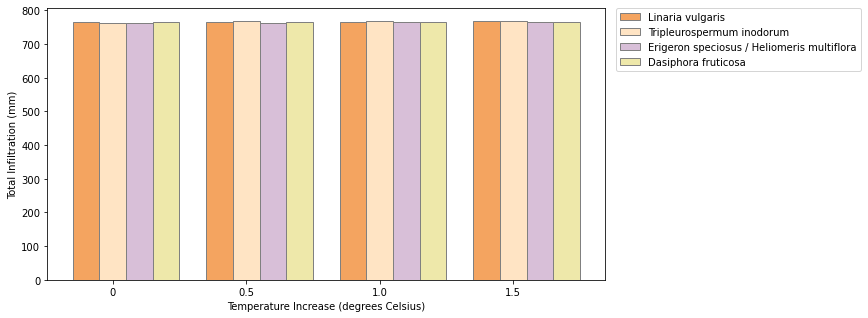

In [10]:
#WATER BALANCE
#INFILTRATION

files = glob(path+"/run1.out.press.*.pfb")
pf_basea=pf.read_pfb_sequence(files)

files = glob(path+"/run2.out.press.*.pfb")
pf_baseb=pf.read_pfb_sequence(files)

files = glob(path+"/run3.out.press.*.pfb")
pf_basec=pf.read_pfb_sequence(files)

files = glob(path+"/run4.out.press.*.pfb")
pf_based=pf.read_pfb_sequence(files)

files = glob(path+"/temp05a.out.press.*.pfb")
pf_temp05a=pf.read_pfb_sequence(files)
files = glob(path+"/temp10a.out.press.*.pfb")
pf_temp10a=pf.read_pfb_sequence(files)
files = glob(path+"/temp15a.out.press.*.pfb")
pf_temp15a=pf.read_pfb_sequence(files)

files = glob(path+"/temp05b.out.press.*.pfb")
pf_temp05b=pf.read_pfb_sequence(files)
files = glob(path+"/temp10b.out.press.*.pfb")
pf_temp10b=pf.read_pfb_sequence(files)
files = glob(path+"/temp15b.out.press.*.pfb")
pf_temp15b=pf.read_pfb_sequence(files)

files = glob(path+"/temp05c.out.press.*.pfb")
pf_temp05c=pf.read_pfb_sequence(files)
files = glob(path+"/temp10c.out.press.*.pfb")
pf_temp10c=pf.read_pfb_sequence(files)
files = glob(path+"/temp15c.out.press.*.pfb")
pf_temp15c=pf.read_pfb_sequence(files)

files = glob(path+"/temp05d.out.press.*.pfb")
pf_temp05d=pf.read_pfb_sequence(files)
files = glob(path+"/temp10d.out.press.*.pfb")
pf_temp10d=pf.read_pfb_sequence(files)
files = glob(path+"/temp15d.out.press.*.pfb")
pf_temp15d=pf.read_pfb_sequence(files)


ibasea=np.sum(CLM_basea[:,9,0,0])*60*60
ibaseb=np.sum(CLM_baseb[:,9,0,0])*60*60
ibasec=np.sum(CLM_basec[:,9,0,0])*60*60
ibased=np.sum(CLM_based[:,9,0,0])*60*60
itemp05a=np.sum(CLM_temp05a[:,9,0,0])*60*60
itemp05b=np.sum(CLM_temp05b[:,9,0,0])*60*60
itemp05c=np.sum(CLM_temp05c[:,9,0,0])*60*60
itemp05d=np.sum(CLM_temp05d[:,9,0,0])*60*60
itemp10a=np.sum(CLM_temp10a[:,9,0,0])*60*60
itemp10b=np.sum(CLM_temp10b[:,9,0,0])*60*60
itemp10c=np.sum(CLM_temp10c[:,9,0,0])*60*60
itemp10d=np.sum(CLM_temp10d[:,9,0,0])*60*60
itemp15a=np.sum(CLM_temp15a[:,9,0,0])*60*60
itemp15b=np.sum(CLM_temp15b[:,9,0,0])*60*60
itemp15c=np.sum(CLM_temp15c[:,9,0,0])*60*60
itemp15d=np.sum(CLM_temp15d[:,9,0,0])*60*60


fig, ax = plt.subplots(figsize=(10, 5))
tempbase=[ibasea,ibaseb,ibasec,ibased]
temp05=[itemp05a,itemp05b,itemp05c,itemp05d]
temp10=[itemp10a,itemp10b,itemp10c,itemp10d]
temp15=[itemp15a,itemp15b,itemp15c,itemp15d]

linaria_vulgaris=[ibasea,itemp05a,itemp10a,itemp15a]
tripleurospermum_inodorum=[ibaseb,itemp05b,itemp10b,itemp15b]
erigeron_speciosus_heliomeris_multiflora=[ibasec,itemp05c,itemp10c,itemp15c]
dasiphora_fructicosa=[ibased,itemp05d,itemp10d,itemp15d]

barWidth=0.2
br1=np.arange(len(linaria_vulgaris))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]

plt.bar(br1,linaria_vulgaris,edgecolor='grey',color='sandybrown',width=barWidth,label="Linaria vulgaris")
plt.bar(br2,tripleurospermum_inodorum,edgecolor='grey',color='bisque',width=barWidth,label='Tripleurospermum inodorum')
plt.bar(br3,erigeron_speciosus_heliomeris_multiflora,edgecolor='grey',color='thistle',width=barWidth,label='Erigeron speciosus / Heliomeris multiflora')
plt.bar(br4,dasiphora_fructicosa,color='palegoldenrod',edgecolor='grey',width=barWidth,label='Dasiphora fruticosa')

plt.xlabel('Temperature Increase (degrees Celsius)')
plt.ylabel('Total Infiltration (mm)')
plt.xticks([r + barWidth for r in range(len(linaria_vulgaris))],['0','0.5','1.0','1.5'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()




In [11]:
print(tempbase)
print(temp05)
print(temp10)
print(temp15)

[765.2986216222073, 762.4815425138243, 763.6626048090494, 765.0847224119138]
[764.0811986606603, 768.5221992073622, 762.6607394085959, 764.1178314422986]
[766.6215854606538, 766.9347264630981, 764.7870868211849, 766.4528180790568]
[767.1374860673607, 767.4897048376408, 765.2956151709022, 766.7507740762761]


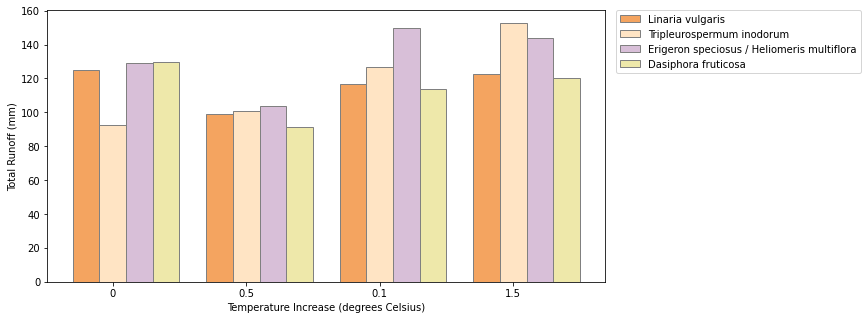

In [12]:
#RUNOFF
rbasea = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_basea[:,19,0,0],0.0)**(5.0/3.0))*1000
rbaseb = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_baseb[:,19,0,0],0.0)**(5.0/3.0))*1000
rbasec = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_basec[:,19,0,0],0.0)**(5.0/3.0))*1000
rbased = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_based[:,19,0,0],0.0)**(5.0/3.0))*1000
rtemp05a = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_temp05a[:,19,0,0],0.0)**(5.0/3.0))*1000
rtemp10a = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_temp10a[:,19,0,0],0.0)**(5.0/3.0))*1000
rtemp15a = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_temp15a[:,19,0,0],0.0)**(5.0/3.0))*1000
rtemp05b = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_temp05b[:,19,0,0],0.0)**(5.0/3.0))*1000
rtemp10b = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_temp10b[:,19,0,0],0.0)**(5.0/3.0))*1000
rtemp15b = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_temp15b[:,19,0,0],0.0)**(5.0/3.0))*1000
rtemp05c = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_temp05c[:,19,0,0],0.0)**(5.0/3.0))*1000
rtemp10c = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_temp10c[:,19,0,0],0.0)**(5.0/3.0))*1000
rtemp15c = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_temp15c[:,19,0,0],0.0)**(5.0/3.0))*1000
rtemp05d = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_temp05d[:,19,0,0],0.0)**(5.0/3.0))*1000
rtemp10d = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_temp10d[:,19,0,0],0.0)**(5.0/3.0))*1000
rtemp15d = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_temp15d[:,19,0,0],0.0)**(5.0/3.0))*1000



fig, ax = plt.subplots(figsize=(10, 5))
tempbase=[rbasea,rbaseb,rbasec,rbased]
temp05=[rtemp05a,rtemp05b,rtemp05c,rtemp05d]
temp10=[rtemp10a,rtemp10b,rtemp10c,rtemp10d]
temp15=[rtemp15a,rtemp15b,rtemp15c,rtemp15d]

linaria_vulgaris=[rbasea,rtemp05a,rtemp10a,rtemp15a]
tripleurospermum_inodorum=[rbaseb,rtemp05b,rtemp10b,rtemp15b]
erigeron_speciosus_heliomeris_multiflora=[rbasec,rtemp05c,rtemp10c,rtemp15c]
dasiphora_fructicosa=[rbased,rtemp05d,rtemp10d,rtemp15d]

barWidth=0.2
br1=np.arange(len(linaria_vulgaris))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]

plt.bar(br1,linaria_vulgaris,edgecolor='grey',color='sandybrown',width=barWidth,label="Linaria vulgaris")
plt.bar(br2,tripleurospermum_inodorum,edgecolor='grey',color='bisque',width=barWidth,label='Tripleurospermum inodorum')
plt.bar(br3,erigeron_speciosus_heliomeris_multiflora,edgecolor='grey',color='thistle',width=barWidth,label='Erigeron speciosus / Heliomeris multiflora')
plt.bar(br4,dasiphora_fructicosa,color='palegoldenrod',edgecolor='grey',width=barWidth,label='Dasiphora fruticosa')

plt.xlabel('Temperature Increase (degrees Celsius)')
plt.ylabel('Total Runoff (mm)')
plt.xticks([r + barWidth for r in range(len(linaria_vulgaris))],['0','0.5','0.1','1.5'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

